In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
s=pd.read_csv("results2.csv",sep=',')
s

,,Area,Mean,Min,Max,Major,Minor,Angle
0,1,6708,255,255,255,485.858,17.579,8.226
1,2,6710,255,255,255,485.213,17.608,8.481
2,3,6714,255,255,255,485.221,17.618,8.443
3,4,6710,255,255,255,486.195,17.572,8.167
4,5,6703,255,255,255,487.903,17.492,7.640
...,...,...,...,...,...,...,...,...
3995,3996,6823,255,255,255,501.885,17.309,177.029
3996,3997,6755,255,255,255,501.593,17.147,177.964
3997,3998,6719,255,255,255,501.662,17.053,178.996
3998,3999,6515,255,255,255,500.400,16.577,0.088


In [4]:
F = s.iloc[:,0].to_numpy() 

In [5]:
Fps = np.zeros_like(F).astype(float)
for i in range(len(Fps)):
    Fps[i] = F[i]/30
Fps

array([3.33333333e-02, 6.66666667e-02, 1.00000000e-01, ...,
       1.33266667e+02, 1.33300000e+02, 1.33333333e+02])

In [45]:
A = s.iloc[:,7].to_numpy()
display(A)
A_1 = np.zeros_like(A)
A_2 = 0
for i in range(len(A)):
    if A[i]>=90:
        A_1[i] = A[i]-180
    else:
        A_1[i] = A[i]



array([8.22600e+00, 8.48100e+00, 8.44300e+00, ..., 1.78996e+02,
       8.80000e-02, 1.18500e+00])

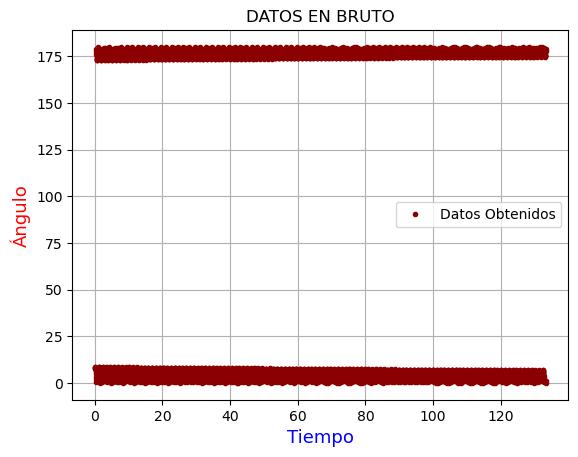

In [101]:
plt.plot(Fps,A,'.', color='darkred', label = 'Datos Obtenidos')
plt.xlabel('Tiempo',color='b',size=13)
plt.title('DATOS EN BRUTO')
plt.ylabel('Ángulo',color='r',size=13)
plt.legend()
plt.grid()

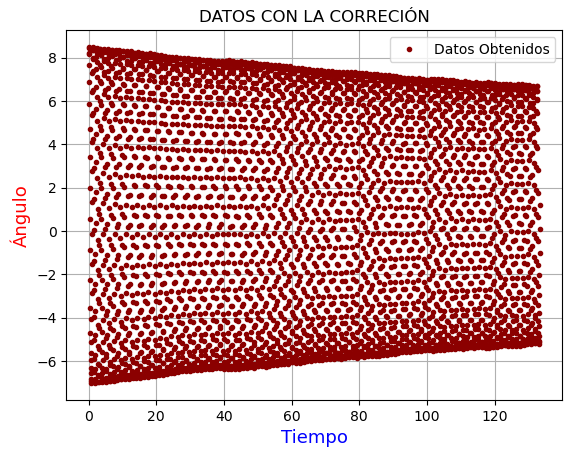

In [102]:
plt.plot(Fps,A_1,'.', color='darkred', label = 'Datos Obtenidos')
plt.xlabel('Tiempo',color='b',size=13)
plt.title('DATOS CON LA CORRECIÓN')
plt.ylabel('Ángulo',color='r',size=13)
plt.legend()
plt.grid()

In [71]:
x = np.max(A_1)
y = np.argmax(A_1)
display(y)
y
filtered_arr = A_1[A_1 != x]

# Encuentra el siguiente máximo
second_max = np.max(filtered_arr)
second_maxy = np.argmax(filtered_arr)
display(second_maxy)
q = Fps[y]-Fps[second_maxy]
q

35

1

1.1333333333333333

In [9]:
tao = int(np.max(Fps)/1.13)
tao

74

In [10]:
i = 1.8
z = 0
G_1 = np.zeros(tao)
X_1 = np.zeros(tao)
while True:
    k = 0
    for j in range(len(Fps)):
        if Fps[j]<= i and Fps[j]> (i-1.8):
            k+=1
    g = np.zeros(k)
    k_1 = 0
    for j in range(len(Fps)):
        if Fps[j]<= i and Fps[j]> (i-1.8):
            g[k_1]= j
            k_1+=1
    display(g)
    k_1 =0
    G = np.zeros(k)
   
    for j in range(k):
        a = int(g[j])
        G[j] = A_1[a]
    display(G)
    G_1[z] = np.max(G)
    X_011 = np.where(A_1 == G_1[z])[0]
    X_1[z] = X_011[0]
    i+=1.8
    z+=1
    if z == 74:
        break 

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53.])

array([ 8.226,  8.481,  8.443,  8.167,  7.64 ,  6.859,  5.864,  4.698,
        3.396,  1.997,  0.558, -0.898, -2.274, -3.56 , -4.691, -5.627,
       -6.336, -6.806, -7.007, -6.916, -6.569, -5.96 , -5.12 , -4.07 ,
       -2.858, -1.513, -0.117,  1.339,  2.761,  4.11 ,  5.331,  6.397,
        7.279,  7.937,  8.342,  8.492,  8.368,  7.99 ,  7.365,  6.512,
        5.461,  4.25 ,  2.901,  1.483,  0.047, -1.392, -2.741, -3.968,
       -5.034, -5.897, -6.523, -6.887, -6.998, -6.811])

array([ 54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.])

array([-6.383, -5.703, -4.788, -3.68 , -2.421, -1.065,  0.371,  1.782,
        3.167,  4.477,  5.647,  6.657,  7.467,  8.045,  8.369,  8.445,
        8.231,  7.795,  7.109,  6.192,  5.084,  3.827,  2.454,  1.033,
       -0.414, -1.804, -3.133, -4.322, -5.321, -6.113, -6.662, -6.949,
       -6.971, -6.71 , -6.198, -5.439, -4.463, -3.306, -2.019, -0.635,
        0.799,  2.221,  3.593,  4.86 ,  5.98 ,  6.923,  7.664,  8.157,
        8.405,  8.377,  8.117,  7.586,  6.81 ,  5.83 ])

array([108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118.,
       119., 120., 121., 122., 123., 124., 125., 126., 127., 128., 129.,
       130., 131., 132., 133., 134., 135., 136., 137., 138., 139., 140.,
       141., 142., 143., 144., 145., 146., 147., 148., 149., 150., 151.,
       152., 153., 154., 155., 156., 157., 158., 159., 160., 161.])

array([ 4.677,  3.392,  2.001,  0.562, -0.862, -2.244, -3.529, -4.659,
       -5.577, -6.296, -6.76 , -6.972, -6.884, -6.545, -5.953, -5.127,
       -4.091, -2.889, -1.551, -0.152,  1.282,  2.67 ,  4.004,  5.236,
        6.305,  7.179,  7.832,  8.245,  8.412,  8.294,  7.936,  7.327,
        6.497,  5.458,  4.251,  2.931,  1.528,  0.093, -1.32 , -2.663,
       -3.889, -4.955, -5.826, -6.454, -6.832, -6.947, -6.768, -6.355,
       -5.69 , -4.791, -3.702, -2.461, -1.101,  0.303])

array([162., 163., 164., 165., 166., 167., 168., 169., 170., 171., 172.,
       173., 174., 175., 176., 177., 178., 179., 180., 181., 182., 183.,
       184., 185., 186., 187., 188., 189., 190., 191., 192., 193., 194.,
       195., 196., 197., 198., 199., 200., 201., 202., 203., 204., 205.,
       206., 207., 208., 209., 210., 211., 212., 213., 214., 215.])

array([ 1.726,  3.101,  4.4  ,  5.57 ,  6.585,  7.395,  7.974,  8.311,
        8.399,  8.2  ,  7.769,  7.075,  6.171,  5.078,  3.845,  2.504,
        1.08 , -0.349, -1.757, -3.076, -4.241, -5.241, -6.04 , -6.602,
       -6.902, -6.923, -6.674, -6.162, -5.418, -4.461, -3.32 , -2.04 ,
       -0.65 ,  0.756,  2.183,  3.546,  4.796,  5.926,  6.876,  7.609,
        8.098,  8.337,  8.335,  8.058,  7.526,  6.774,  5.807,  4.668,
        3.378,  2.001,  0.589, -0.837, -2.206, -3.477])

array([216., 217., 218., 219., 220., 221., 222., 223., 224., 225., 226.,
       227., 228., 229., 230., 231., 232., 233., 234., 235., 236., 237.,
       238., 239., 240., 241., 242., 243., 244., 245., 246., 247., 248.,
       249., 250., 251., 252., 253., 254., 255., 256., 257., 258., 259.,
       260., 261., 262., 263., 264., 265., 266., 267., 268., 269.])

array([-4.577, -5.504, -6.216, -6.692, -6.896, -6.808, -6.485, -5.895,
       -5.089, -4.063, -2.885, -1.566, -0.143,  1.238,  2.635,  3.958,
        5.172,  6.242,  7.113,  7.764,  8.179,  8.359,  8.245,  7.898,
        7.293,  6.48 ,  5.461,  4.275,  2.971,  1.576,  0.205, -1.288,
       -2.63 , -3.838, -4.895, -5.751, -6.386, -6.757, -6.882, -6.707,
       -6.29 , -5.631, -4.748, -3.671, -2.439, -1.09 ,  0.308,  1.698,
        3.081,  4.371,  5.54 ,  6.534,  7.339,  7.922])

array([270., 271., 272., 273., 274., 275., 276., 277., 278., 279., 280.,
       281., 282., 283., 284., 285., 286., 287., 288., 289., 290., 291.,
       292., 293., 294., 295., 296., 297., 298., 299., 300., 301., 302.,
       303., 304., 305., 306., 307., 308., 309., 310., 311., 312., 313.,
       314., 315., 316., 317., 318., 319., 320., 321., 322., 323.])

array([ 8.246,  8.343,  8.151,  7.722,  7.04 ,  6.147,  5.07 ,  3.85 ,
        2.508,  1.099, -0.308, -1.707, -3.006, -4.18 , -5.164, -5.956,
       -6.513, -6.811, -6.844, -6.584, -6.08 , -5.35 , -4.403, -3.274,
       -2.004, -0.631,  0.763,  2.165,  3.506,  4.764,  5.877,  6.804,
        7.537,  8.03 ,  8.287,  8.282,  8.005,  7.492,  6.747,  5.791,
        4.666,  3.406,  2.046,  0.655, -0.755, -2.125, -3.373, -4.491,
       -5.423, -6.136, -6.604, -6.808, -6.729, -6.42 ])

array([324., 325., 326., 327., 328., 329., 330., 331., 332., 333., 334.,
       335., 336., 337., 338., 339., 340., 341., 342., 343., 344., 345.,
       346., 347., 348., 349., 350., 351., 352., 353., 354., 355., 356.,
       357., 358., 359., 360., 361., 362., 363., 364., 365., 366., 367.,
       368., 369., 370., 371., 372., 373., 374., 375., 376., 377.])

array([-5.841, -5.041, -4.031, -2.858, -1.552, -0.138,  1.206,  2.585,
        3.912,  5.114,  6.173,  7.036,  7.692,  8.109,  8.285,  8.184,
        7.848,  7.259,  6.446,  5.443,  4.263,  2.967,  1.599,  0.206,
       -1.199, -2.536, -3.745, -4.802, -5.659, -6.285, -6.677, -6.805,
       -6.653, -6.247, -5.591, -4.714, -3.651, -2.443, -1.119,  0.274,
        1.676,  3.036,  4.315,  5.472,  6.47 ,  7.272,  7.859,  8.192,
        8.284,  8.088,  7.671,  7.012,  6.142,  5.066])

array([378., 379., 380., 381., 382., 383., 384., 385., 386., 387., 388.,
       389., 390., 391., 392., 393., 394., 395., 396., 397., 398., 399.,
       400., 401., 402., 403., 404., 405., 406., 407., 408., 409., 410.,
       411., 412., 413., 414., 415., 416., 417., 418., 419., 420., 421.,
       422., 423., 424., 425., 426., 427., 428., 429., 430., 431.])

array([ 3.846,  2.518,  1.124, -0.289, -1.651, -2.954, -4.112, -5.113,
       -5.89 , -6.438, -6.732, -6.78 , -6.536, -6.048, -5.318, -4.385,
       -3.264, -2.01 , -0.651,  0.743,  2.12 ,  3.457,  4.712,  5.811,
        6.746,  7.474,  7.974,  8.228,  8.222,  7.961,  7.463,  6.728,
        5.777,  4.657,  3.409,  2.067,  0.67 , -0.729, -2.088, -3.338,
       -4.448, -5.371, -6.077, -6.551, -6.769, -6.706, -6.389, -5.817,
       -5.024, -4.021, -2.858, -1.555, -0.137,  1.196])

array([432., 433., 434., 435., 436., 437., 438., 439., 440., 441., 442.,
       443., 444., 445., 446., 447., 448., 449., 450., 451., 452., 453.,
       454., 455., 456., 457., 458., 459., 460., 461., 462., 463., 464.,
       465., 466., 467., 468., 469., 470., 471., 472., 473., 474., 475.,
       476., 477., 478., 479., 480., 481., 482., 483., 484., 485.])

array([ 2.567,  3.887,  5.08 ,  6.138,  7.004,  7.666,  8.079,  8.236,
        8.131,  7.809,  7.241,  6.429,  5.416,  4.24 ,  2.95 ,  1.601,
        0.214, -1.185, -2.513, -3.721, -4.771, -5.615, -6.244, -6.637,
       -6.77 , -6.612, -6.205, -5.558, -4.685, -3.629, -2.425, -1.105,
        0.272,  1.672,  3.026,  4.295,  5.442,  6.43 ,  7.239,  7.812,
        8.14 ,  8.221,  8.032,  7.62 ,  6.962,  6.09 ,  5.034,  3.825,
        2.495,  1.111, -0.278, -1.627, -2.921, -4.078])

array([486., 487., 488., 489., 490., 491., 492., 493., 494., 495., 496.,
       497., 498., 499., 500., 501., 502., 503., 504., 505., 506., 507.,
       508., 509., 510., 511., 512., 513., 514., 515., 516., 517., 518.,
       519., 520., 521., 522., 523., 524., 525., 526., 527., 528., 529.,
       530., 531., 532., 533., 534., 535., 536., 537., 538., 539.])

array([-5.057, -5.836, -6.387, -6.69 , -6.726, -6.47 , -5.988, -5.269,
       -4.341, -3.232, -1.993, -0.64 ,  0.74 ,  2.119,  3.433,  4.665,
        5.771,  6.706,  7.421,  7.911,  8.165,  8.163,  7.917,  7.421,
        6.699,  5.765,  4.649,  3.39 ,  2.065,  0.674, -0.71 , -2.058,
       -3.303, -4.404, -5.328, -6.043, -6.512, -6.718, -6.646, -6.333,
       -5.775, -4.989, -3.986, -2.834, -1.542, -0.135,  1.195,  2.556,
        3.859,  5.05 ,  6.099,  6.957,  7.607,  8.02 ])

array([540., 541., 542., 543., 544., 545., 546., 547., 548., 549., 550.,
       551., 552., 553., 554., 555., 556., 557., 558., 559., 560., 561.,
       562., 563., 564., 565., 566., 567., 568., 569., 570., 571., 572.,
       573., 574., 575., 576., 577., 578., 579., 580., 581., 582., 583.,
       584., 585., 586., 587., 588., 589., 590., 591., 592., 593.])

array([ 8.196,  8.098,  7.765,  7.184,  6.386,  5.39 ,  4.233,  2.944,
        1.588,  0.203, -1.182, -2.487, -3.683, -4.723, -5.574, -6.197,
       -6.576, -6.7  , -6.554, -6.159, -5.516, -4.657, -3.606, -2.407,
       -1.093,  0.267,  1.64 ,  2.987,  4.253,  5.404,  6.371,  7.169,
        7.746,  8.083,  8.182,  7.985,  7.576,  6.928,  6.065,  5.009,
        3.817,  2.503,  1.127, -0.274, -1.612, -2.884, -4.029, -5.012,
       -5.783, -6.338, -6.634, -6.674, -6.425, -5.945])

array([594., 595., 596., 597., 598., 599., 600., 601., 602., 603., 604.,
       605., 606., 607., 608., 609., 610., 611., 612., 613., 614., 615.,
       616., 617., 618., 619., 620., 621., 622., 623., 624., 625., 626.,
       627., 628., 629., 630., 631., 632., 633., 634., 635., 636., 637.,
       638., 639., 640., 641., 642., 643., 644., 645., 646., 647.])

array([-5.237, -4.31 , -3.211, -1.974, -0.629,  0.724,  2.101,  3.412,
        4.634,  5.73 ,  6.661,  7.372,  7.857,  8.11 ,  8.109,  7.868,
        7.359,  6.636,  5.718,  4.627,  3.377,  2.047,  0.683, -0.694,
       -2.018, -3.252, -4.348, -5.252, -5.965, -6.425, -6.631, -6.563,
       -6.262, -5.712, -4.928, -3.943, -2.8  , -1.533, -0.138,  1.181,
        2.531,  3.815,  5.   ,  6.041,  6.892,  7.527,  7.941,  8.125,
        8.027,  7.694,  7.121,  6.336,  5.359,  4.214])

array([648., 649., 650., 651., 652., 653., 654., 655., 656., 657., 658.,
       659., 660., 661., 662., 663., 664., 665., 666., 667., 668., 669.,
       670., 671., 672., 673., 674., 675., 676., 677., 678., 679., 680.,
       681., 682., 683., 684., 685., 686., 687., 688., 689., 690., 691.,
       692., 693., 694., 695., 696., 697., 698., 699., 700., 701.])

array([ 2.937,  1.605,  0.192, -1.141, -2.443, -3.63 , -4.657, -5.497,
       -6.107, -6.49 , -6.624, -6.477, -6.084, -5.451, -4.594, -3.562,
       -2.388, -1.088,  0.267,  1.631,  2.952,  4.203,  5.357,  6.342,
        7.111,  7.672,  7.991,  8.093,  7.909,  7.5  ,  6.854,  5.993,
        4.951,  3.772,  2.473,  1.105, -0.276, -1.599, -2.854, -3.979,
       -4.96 , -5.735, -6.271, -6.554, -6.584, -6.357, -5.884, -5.182,
       -4.247, -3.154, -1.945, -0.616,  0.698,  2.068])

array([702., 703., 704., 705., 706., 707., 708., 709., 710., 711., 712.,
       713., 714., 715., 716., 717., 718., 719., 720., 721., 722., 723.,
       724., 725., 726., 727., 728., 729., 730., 731., 732., 733., 734.,
       735., 736., 737., 738., 739., 740., 741., 742., 743., 744., 745.,
       746., 747., 748., 749., 750., 751., 752., 753., 754., 755.])

array([ 3.371,  4.603,  5.688,  6.585,  7.29 ,  7.781,  8.042,  8.036,
        7.76 ,  7.27 ,  6.57 ,  5.662,  4.565,  3.332,  2.023,  0.68 ,
       -0.687, -2.   , -3.223, -4.303, -5.208, -5.895, -6.339, -6.546,
       -6.484, -6.196, -5.631, -4.855, -3.882, -2.756, -1.502, -0.13 ,
        1.183,  2.509,  3.784,  4.952,  5.972,  6.818,  7.456,  7.87 ,
        8.04 ,  7.939,  7.615,  7.057,  6.276,  5.3  ,  4.166,  2.901,
        1.577,  0.217, -1.12 , -2.399, -3.581, -4.597])

array([756., 757., 758., 759., 760., 761., 762., 763., 764., 765., 766.,
       767., 768., 769., 770., 771., 772., 773., 774., 775., 776., 777.,
       778., 779., 780., 781., 782., 783., 784., 785., 786., 787., 788.,
       789., 790., 791., 792., 793., 794., 795., 796., 797., 798., 799.,
       800., 801., 802., 803., 804., 805., 806., 807., 808., 809.])

array([-5.427, -6.034, -6.405, -6.535, -6.384, -5.99 , -5.363, -4.524,
       -3.5  , -2.329, -1.066,  0.28 ,  1.64 ,  2.955,  4.184,  5.304,
        6.278,  7.055,  7.604,  7.937,  8.028,  7.842,  7.431,  6.793,
        5.958,  4.923,  3.75 ,  2.473,  1.123, -0.253, -1.557, -2.812,
       -3.918, -4.88 , -5.643, -6.168, -6.451, -6.484, -6.251, -5.791,
       -5.091, -4.186, -3.108, -1.908, -0.608,  0.741,  2.081,  3.361,
        4.571,  5.641,  6.544,  7.24 ,  7.725,  7.973])

array([810., 811., 812., 813., 814., 815., 816., 817., 818., 819., 820.,
       821., 822., 823., 824., 825., 826., 827., 828., 829., 830., 831.,
       832., 833., 834., 835., 836., 837., 838., 839., 840., 841., 842.,
       843., 844., 845., 846., 847., 848., 849., 850., 851., 852., 853.,
       854., 855., 856., 857., 858., 859., 860., 861., 862., 863.])

array([ 7.968,  7.72 ,  7.233,  6.522,  5.616,  4.548,  3.326,  2.022,
        0.686, -0.666, -1.973, -3.182, -4.244, -5.143, -5.828, -6.278,
       -6.48 , -6.412, -6.11 , -5.56 , -4.8  , -3.833, -2.711, -1.476,
       -0.128,  1.177,  2.505,  3.773,  4.928,  5.949,  6.781,  7.406,
        7.818,  7.994,  7.894,  7.57 ,  7.016,  6.241,  5.27 ,  4.147,
        2.902,  1.586,  0.227, -1.106, -2.376, -3.539, -4.557, -5.381,
       -5.984, -6.355, -6.475, -6.327, -5.943, -5.317])

array([864., 865., 866., 867., 868., 869., 870., 871., 872., 873., 874.,
       875., 876., 877., 878., 879., 880., 881., 882., 883., 884., 885.,
       886., 887., 888., 889., 890., 891., 892., 893., 894., 895., 896.,
       897., 898., 899., 900., 901., 902., 903., 904., 905., 906., 907.,
       908., 909., 910., 911., 912., 913., 914., 915., 916., 917.])

array([-4.477, -3.463, -2.302, -1.041,  0.298,  1.641,  2.936,  4.167,
        5.286,  6.238,  7.006,  7.564,  7.891,  7.979,  7.793,  7.394,
        6.76 ,  5.915,  4.897,  3.733,  2.464,  1.124, -0.249, -1.533,
       -2.776, -3.883, -4.841, -5.588, -6.114, -6.404, -6.443, -6.207,
       -5.742, -5.051, -4.154, -3.085, -1.891, -0.6  ,  0.744,  2.072,
        3.349,  4.539,  5.599,  6.493,  7.193,  7.675,  7.92 ,  7.92 ,
        7.679,  7.196,  6.491,  5.59 ,  4.52 ,  3.316])

array([918., 919., 920., 921., 922., 923., 924., 925., 926., 927., 928.,
       929., 930., 931., 932., 933., 934., 935., 936., 937., 938., 939.,
       940., 941., 942., 943., 944., 945., 946., 947., 948., 949., 950.,
       951., 952., 953., 954., 955., 956., 957., 958., 959., 960., 961.,
       962., 963., 964., 965., 966., 967., 968., 969., 970., 971.])

array([ 2.018,  0.68 , -0.642, -1.95 , -3.151, -4.21 , -5.099, -5.78 ,
       -6.221, -6.429, -6.36 , -6.066, -5.529, -4.763, -3.804, -2.692,
       -1.46 , -0.131,  1.177,  2.493,  3.745,  4.896,  5.902,  6.732,
        7.361,  7.77 ,  7.933,  7.836,  7.523,  6.967,  6.202,  5.238,
        4.124,  2.888,  1.577,  0.198, -1.085, -2.36 , -3.517, -4.517,
       -5.334, -5.938, -6.309, -6.432, -6.278, -5.9  , -5.281, -4.455,
       -3.445, -2.287, -1.032,  0.296,  1.623,  2.913])

array([ 972.,  973.,  974.,  975.,  976.,  977.,  978.,  979.,  980.,
        981.,  982.,  983.,  984.,  985.,  986.,  987.,  988.,  989.,
        990.,  991.,  992.,  993.,  994.,  995.,  996.,  997.,  998.,
        999., 1000., 1001., 1002., 1003., 1004., 1005., 1006., 1007.,
       1008., 1009., 1010., 1011., 1012., 1013., 1014., 1015., 1016.,
       1017., 1018., 1019., 1020., 1021., 1022., 1023., 1024., 1025.])

array([ 4.136,  5.244,  6.191,  6.953,  7.504,  7.831,  7.92 ,  7.742,
        7.344,  6.717,  5.886,  4.876,  3.718,  2.458,  1.118, -0.22 ,
       -1.514, -2.744, -3.849, -4.793, -5.541, -6.062, -6.352, -6.399,
       -6.162, -5.709, -5.022, -4.125, -3.069, -1.879, -0.604,  0.733,
        2.053,  3.324,  4.508,  5.562,  6.449,  7.144,  7.627,  7.871,
        7.869,  7.628,  7.149,  6.451,  5.559,  4.497,  3.302,  2.013,
        0.687, -0.622, -1.931, -3.118, -4.176, -5.059])

array([1026., 1027., 1028., 1029., 1030., 1031., 1032., 1033., 1034.,
       1035., 1036., 1037., 1038., 1039., 1040., 1041., 1042., 1043.,
       1044., 1045., 1046., 1047., 1048., 1049., 1050., 1051., 1052.,
       1053., 1054., 1055., 1056., 1057., 1058., 1059., 1060., 1061.,
       1062., 1063., 1064., 1065., 1066., 1067., 1068., 1069., 1070.,
       1071., 1072., 1073., 1074., 1075., 1076., 1077., 1078., 1079.])

array([-5.734, -6.179, -6.384, -6.319, -6.028, -5.495, -4.738, -3.783,
       -2.679, -1.452, -0.13 ,  1.17 ,  2.476,  3.726,  4.87 ,  5.869,
        6.698,  7.324,  7.725,  7.888,  7.792,  7.477,  6.926,  6.163,
        5.213,  4.097,  2.876,  1.568,  0.198, -1.076, -2.335, -3.489,
       -4.49 , -5.304, -5.904, -6.27 , -6.385, -6.237, -5.865, -5.246,
       -4.425, -3.414, -2.261, -1.026,  0.306,  1.626,  2.906,  4.126,
        5.227,  6.171,  6.929,  7.474,  7.79 ,  7.882])

array([1080., 1081., 1082., 1083., 1084., 1085., 1086., 1087., 1088.,
       1089., 1090., 1091., 1092., 1093., 1094., 1095., 1096., 1097.,
       1098., 1099., 1100., 1101., 1102., 1103., 1104., 1105., 1106.,
       1107., 1108., 1109., 1110., 1111., 1112., 1113., 1114., 1115.,
       1116., 1117., 1118., 1119., 1120., 1121., 1122., 1123., 1124.,
       1125., 1126., 1127., 1128., 1129., 1130., 1131., 1132., 1133.])

array([ 7.695,  7.299,  6.681,  5.846,  4.843,  3.694,  2.434,  1.12 ,
       -0.23 , -1.5  , -2.731, -3.83 , -4.775, -5.512, -6.034, -6.315,
       -6.353, -6.126, -5.662, -4.982, -4.095, -3.038, -1.863, -0.584,
        0.738,  2.059,  3.316,  4.498,  5.546,  6.43 ,  7.124,  7.596,
        7.832,  7.832,  7.586,  7.107,  6.418,  5.52 ,  4.461,  3.275,
        1.992,  0.679, -0.629, -1.928, -3.11 , -4.157, -5.035, -5.701,
       -6.142, -6.335, -6.267, -5.976, -5.437, -4.682])

array([1134., 1135., 1136., 1137., 1138., 1139., 1140., 1141., 1142.,
       1143., 1144., 1145., 1146., 1147., 1148., 1149., 1150., 1151.,
       1152., 1153., 1154., 1155., 1156., 1157., 1158., 1159., 1160.,
       1161., 1162., 1163., 1164., 1165., 1166., 1167., 1168., 1169.,
       1170., 1171., 1172., 1173., 1174., 1175., 1176., 1177., 1178.,
       1179., 1180., 1181., 1182., 1183., 1184., 1185., 1186.])

array([-3.742, -2.644, -1.413, -0.122,  1.182,  2.482,  3.725,  4.863,
        5.852,  6.675,  7.293,  7.697,  7.848,  7.761,  7.435,  6.885,
        6.13 ,  5.174,  4.076,  2.856,  1.561,  0.207, -1.076, -2.331,
       -3.473, -4.464, -5.265, -5.857, -6.229, -6.34 , -6.192, -5.807,
       -5.193, -4.388, -3.393, -2.253, -1.019,  0.309,  1.625,  2.898,
        4.094,  5.185,  6.14 ,  6.915,  7.435,  7.748,  7.847,  7.676,
        7.296,  6.664,  5.844,  4.839,  3.692])

array([1187., 1188., 1189., 1190., 1191., 1192., 1193., 1194., 1195.,
       1196., 1197., 1198., 1199., 1200., 1201., 1202., 1203., 1204.,
       1205., 1206., 1207., 1208., 1209., 1210., 1211., 1212., 1213.,
       1214., 1215., 1216., 1217., 1218., 1219., 1220., 1221., 1222.,
       1223., 1224., 1225., 1226., 1227., 1228., 1229., 1230., 1231.,
       1232., 1233., 1234., 1235., 1236., 1237., 1238., 1239., 1240.])

array([ 2.452,  1.131, -0.142, -1.494, -2.718, -3.818, -4.755, -5.512,
       -6.026, -6.31 , -6.362, -6.137, -5.684, -4.99 , -4.094, -3.047,
       -1.871, -0.608,  0.734,  2.057,  3.298,  4.49 ,  5.538,  6.421,
        7.114,  7.591,  7.843,  7.836,  7.582,  7.122,  6.442,  5.54 ,
        4.466,  3.27 ,  2.006,  0.682, -0.641, -1.937, -3.126, -4.178,
       -5.057, -5.724, -6.163, -6.367, -6.306, -6.002, -5.468, -4.719,
       -3.771, -2.679, -1.437, -0.141,  1.16 ,  2.46 ])

array([1241., 1242., 1243., 1244., 1245., 1246., 1247., 1248., 1249.,
       1250., 1251., 1252., 1253., 1254., 1255., 1256., 1257., 1258.,
       1259., 1260., 1261., 1262., 1263., 1264., 1265., 1266., 1267.,
       1268., 1269., 1270., 1271., 1272., 1273., 1274., 1275., 1276.,
       1277., 1278., 1279., 1280., 1281., 1282., 1283., 1284., 1285.,
       1286., 1287., 1288., 1289., 1290., 1291., 1292., 1293., 1294.])

array([ 3.706,  4.85 ,  5.848,  6.664,  7.293,  7.706,  7.879,  7.784,
        7.475,  6.924,  6.155,  5.199,  4.097,  2.881,  1.578,  0.184,
       -1.061, -2.318, -3.472, -4.468, -5.295, -5.88 , -6.244, -6.377,
       -6.229, -5.86 , -5.252, -4.435, -3.439, -2.287, -1.044,  0.226,
        1.579,  2.869,  4.076,  5.16 ,  6.094,  6.876,  7.444,  7.773,
        7.854,  7.668,  7.271,  6.661,  5.858,  4.865,  3.709,  2.441,
        1.125, -0.149, -1.457, -2.704, -3.824, -4.777])

array([1295., 1296., 1297., 1298., 1299., 1300., 1301., 1302., 1303.,
       1304., 1305., 1306., 1307., 1308., 1309., 1310., 1311., 1312.,
       1313., 1314., 1315., 1316., 1317., 1318., 1319., 1320., 1321.,
       1322., 1323., 1324., 1325., 1326., 1327., 1328., 1329., 1330.,
       1331., 1332., 1333., 1334., 1335., 1336., 1337., 1338., 1339.,
       1340., 1341., 1342., 1343., 1344., 1345., 1346., 1347., 1348.])

array([-5.518, -6.036, -6.319, -6.346, -6.124, -5.695, -5.02 , -4.119,
       -3.046, -1.864, -0.615,  0.705,  2.065,  3.333,  4.499,  5.527,
        6.413,  7.112,  7.579,  7.811,  7.81 ,  7.573,  7.078,  6.37 ,
        5.499,  4.456,  3.246,  1.958,  0.659, -0.638, -1.929, -3.114,
       -4.169, -5.035, -5.704, -6.147, -6.346, -6.272, -5.983, -5.453,
       -4.695, -3.743, -2.641, -1.424, -0.139,  1.175,  2.477,  3.712,
        4.841,  5.838,  6.661,  7.265,  7.658,  7.826])

array([1349., 1350., 1351., 1352., 1353., 1354., 1355., 1356., 1357.,
       1358., 1359., 1360., 1361., 1362., 1363., 1364., 1365., 1366.,
       1367., 1368., 1369., 1370., 1371., 1372., 1373., 1374., 1375.,
       1376., 1377., 1378., 1379., 1380., 1381., 1382., 1383., 1384.,
       1385., 1386., 1387., 1388., 1389., 1390., 1391., 1392., 1393.,
       1394., 1395., 1396., 1397., 1398., 1399., 1400., 1401., 1402.])

array([ 7.739,  7.419,  6.861,  6.1  ,  5.155,  4.054,  2.83 ,  1.537,
        0.176, -1.092, -2.337, -3.478, -4.462, -5.27 , -5.864, -6.222,
       -6.341, -6.19 , -5.818, -5.217, -4.393, -3.389, -2.246, -1.002,
        0.293,  1.612,  2.888,  4.089,  5.176,  6.121,  6.867,  7.408,
        7.721,  7.819,  7.641,  7.242,  6.613,  5.786,  4.793,  3.647,
        2.406,  1.093, -0.207, -1.507, -2.738, -3.819, -4.739, -5.467,
       -5.995, -6.275, -6.309, -6.066, -5.605, -4.934])

array([1403., 1404., 1405., 1406., 1407., 1408., 1409., 1410., 1411.,
       1412., 1413., 1414., 1415., 1416., 1417., 1418., 1419., 1420.,
       1421., 1422., 1423., 1424., 1425., 1426., 1427., 1428., 1429.,
       1430., 1431., 1432., 1433., 1434., 1435., 1436., 1437., 1438.,
       1439., 1440., 1441., 1442., 1443., 1444., 1445., 1446., 1447.,
       1448., 1449., 1450., 1451., 1452., 1453., 1454., 1455., 1456.])

array([-4.051, -3.004, -1.836, -0.565,  0.753,  2.055,  3.289,  4.454,
        5.506,  6.388,  7.061,  7.516,  7.76 ,  7.744,  7.512,  7.028,
        6.353,  5.462,  4.411,  3.242,  1.981,  0.654, -0.65 , -1.927,
       -3.092, -4.12 , -4.997, -5.659, -6.086, -6.286, -6.218, -5.925,
       -5.392, -4.646, -3.71 , -2.619, -1.398, -0.115,  1.173,  2.457,
        3.699,  4.823,  5.807,  6.615,  7.225,  7.621,  7.777,  7.674,
        7.366,  6.824,  6.063,  5.115,  4.025,  2.812])

array([1457., 1458., 1459., 1460., 1461., 1462., 1463., 1464., 1465.,
       1466., 1467., 1468., 1469., 1470., 1471., 1472., 1473., 1474.,
       1475., 1476., 1477., 1478., 1479., 1480., 1481., 1482., 1483.,
       1484., 1485., 1486., 1487., 1488., 1489., 1490., 1491., 1492.,
       1493., 1494., 1495., 1496., 1497., 1498., 1499., 1500., 1501.,
       1502., 1503., 1504., 1505., 1506., 1507., 1508., 1509., 1510.])

array([ 1.543,  0.171, -1.074, -2.319, -3.465, -4.445, -5.237, -5.81 ,
       -6.168, -6.302, -6.145, -5.76 , -5.138, -4.329, -3.353, -2.209,
       -0.969,  0.305,  1.635,  2.903,  4.089,  5.157,  6.088,  6.846,
        7.382,  7.67 ,  7.74 ,  7.574,  7.192,  6.568,  5.738,  4.746,
        3.614,  2.376,  1.069, -0.249, -1.515, -2.731, -3.802, -4.72 ,
       -5.444, -5.96 , -6.23 , -6.246, -6.017, -5.562, -4.894, -4.014,
       -2.971, -1.799, -0.537,  0.762,  2.062,  3.297])

array([1511., 1512., 1513., 1514., 1515., 1516., 1517., 1518., 1519.,
       1520., 1521., 1522., 1523., 1524., 1525., 1526., 1527., 1528.,
       1529., 1530., 1531., 1532., 1533., 1534., 1535., 1536., 1537.,
       1538., 1539., 1540., 1541., 1542., 1543., 1544., 1545., 1546.,
       1547., 1548., 1549., 1550., 1551., 1552., 1553., 1554., 1555.,
       1556., 1557., 1558., 1559., 1560., 1561., 1562., 1563., 1564.])

array([ 4.46 ,  5.486,  6.357,  7.029,  7.485,  7.717,  7.71 ,  7.463,
        6.986,  6.302,  5.415,  4.372,  3.191,  1.935,  0.644, -0.676,
       -1.941, -3.099, -4.122, -4.977, -5.626, -6.054, -6.248, -6.177,
       -5.888, -5.353, -4.602, -3.674, -2.59 , -1.389, -0.099,  1.185,
        2.458,  3.679,  4.798,  5.783,  6.58 ,  7.178,  7.566,  7.725,
        7.619,  7.3  ,  6.758,  6.006,  5.07 ,  3.98 ,  2.784,  1.516,
        0.162, -1.094, -2.309, -3.438, -4.409, -5.204])

array([1565., 1566., 1567., 1568., 1569., 1570., 1571., 1572., 1573.,
       1574., 1575., 1576., 1577., 1578., 1579., 1580., 1581., 1582.,
       1583., 1584., 1585., 1586., 1587., 1588., 1589., 1590., 1591.,
       1592., 1593., 1594., 1595., 1596., 1597., 1598., 1599., 1600.,
       1601., 1602., 1603., 1604., 1605., 1606., 1607., 1608., 1609.,
       1610., 1611., 1612., 1613., 1614., 1615., 1616., 1617., 1618.])

array([-5.792, -6.137, -6.255, -6.091, -5.715, -5.115, -4.297, -3.315,
       -2.19 , -0.972,  0.294,  1.603,  2.868,  4.06 ,  5.138,  6.052,
        6.782,  7.313,  7.635,  7.719,  7.525,  7.126,  6.52 ,  5.703,
        4.718,  3.584,  2.359,  1.074, -0.23 , -1.49 , -2.686, -3.762,
       -4.682, -5.4  , -5.902, -6.17 , -6.206, -5.976, -5.524, -4.85 ,
       -3.98 , -2.95 , -1.781, -0.53 ,  0.757,  2.042,  3.273,  4.436,
        5.451,  6.31 ,  6.979,  7.448,  7.674,  7.656])

array([1619., 1620., 1621., 1622., 1623., 1624., 1625., 1626., 1627.,
       1628., 1629., 1630., 1631., 1632., 1633., 1634., 1635., 1636.,
       1637., 1638., 1639., 1640., 1641., 1642., 1643., 1644., 1645.,
       1646., 1647., 1648., 1649., 1650., 1651., 1652., 1653., 1654.,
       1655., 1656., 1657., 1658., 1659., 1660., 1661., 1662., 1663.,
       1664., 1665., 1666., 1667., 1668., 1669., 1670., 1671., 1672.])

array([ 7.406,  6.936,  6.252,  5.374,  4.333,  3.17 ,  1.915,  0.636,
       -0.661, -1.91 , -3.062, -4.082, -4.938, -5.582, -6.004, -6.184,
       -6.111, -5.819, -5.284, -4.537, -3.613, -2.532, -1.333, -0.082,
        1.201,  2.461,  3.682,  4.794,  5.751,  6.541,  7.137,  7.519,
        7.664,  7.565,  7.243,  6.701,  5.946,  5.009,  3.928,  2.744,
        1.483,  0.19 , -1.102, -2.318, -3.427, -4.389, -5.175, -5.735,
       -6.072, -6.179, -6.014, -5.64 , -5.033, -4.226])

array([1673., 1674., 1675., 1676., 1677., 1678., 1679., 1680., 1681.,
       1682., 1683., 1684., 1685., 1686., 1687., 1688., 1689., 1690.,
       1691., 1692., 1693., 1694., 1695., 1696., 1697., 1698., 1699.,
       1700., 1701., 1702., 1703., 1704., 1705., 1706., 1707., 1708.,
       1709., 1710., 1711., 1712., 1713., 1714., 1715., 1716., 1717.,
       1718., 1719., 1720., 1721., 1722., 1723., 1724., 1725., 1726.])

array([-3.245, -2.126, -0.91 ,  0.35 ,  1.644,  2.89 ,  4.069,  5.122,
        6.023,  6.755,  7.287,  7.581,  7.653,  7.454,  7.063,  6.454,
        5.64 ,  4.658,  3.523,  2.295,  1.014, -0.268, -1.496, -2.696,
       -3.766, -4.668, -5.369, -5.86 , -6.122, -6.14 , -5.915, -5.449,
       -4.78 , -3.907, -2.883, -1.725, -0.502,  0.795,  2.087,  3.302,
        4.432,  5.444,  6.3  ,  6.955,  7.398,  7.611,  7.6  ,  7.347,
        6.872,  6.187,  5.31 ,  4.274,  3.12 ,  1.879])

array([1727., 1728., 1729., 1730., 1731., 1732., 1733., 1734., 1735.,
       1736., 1737., 1738., 1739., 1740., 1741., 1742., 1743., 1744.,
       1745., 1746., 1747., 1748., 1749., 1750., 1751., 1752., 1753.,
       1754., 1755., 1756., 1757., 1758., 1759., 1760., 1761., 1762.,
       1763., 1764., 1765., 1766., 1767., 1768., 1769., 1770., 1771.,
       1772., 1773., 1774., 1775., 1776., 1777., 1778., 1779., 1780.])

array([ 0.608, -0.67 , -1.918, -3.062, -4.068, -4.91 , -5.545, -5.962,
       -6.146, -6.062, -5.762, -5.23 , -4.492, -3.569, -2.498, -1.303,
       -0.076,  1.232,  2.486,  3.678,  4.77 ,  5.735,  6.528,  7.108,
        7.475,  7.629,  7.524,  7.198,  6.641,  5.887,  4.965,  3.879,
        2.717,  1.442,  0.168, -1.111, -2.308, -3.39 , -4.361, -5.153,
       -5.709, -6.038, -6.135, -5.975, -5.614, -5.011, -4.195, -3.209,
       -2.097, -0.89 ,  0.386,  1.645,  2.892,  4.054])

array([1781., 1782., 1783., 1784., 1785., 1786., 1787., 1788., 1789.,
       1790., 1791., 1792., 1793., 1794., 1795., 1796., 1797., 1798.,
       1799., 1800., 1801., 1802., 1803., 1804., 1805., 1806., 1807.,
       1808., 1809., 1810., 1811., 1812., 1813., 1814., 1815., 1816.,
       1817., 1818., 1819., 1820., 1821., 1822., 1823., 1824., 1825.,
       1826., 1827., 1828., 1829., 1830., 1831., 1832., 1833., 1834.])

array([ 5.11 ,  6.009,  6.724,  7.233,  7.528,  7.604,  7.404,  7.002,
        6.387,  5.573,  4.597,  3.472,  2.259,  0.986, -0.28 , -1.526,
       -2.7  , -3.751, -4.633, -5.334, -5.81 , -6.062, -6.063, -5.84 ,
       -5.387, -4.725, -3.863, -2.825, -1.681, -0.478,  0.771,  2.051,
        3.257,  4.388,  5.396,  6.24 ,  6.874,  7.299,  7.534,  7.534,
        7.28 ,  6.791,  6.106,  5.254,  4.226,  3.077,  1.846,  0.579,
       -0.694, -1.928, -3.044, -4.032, -4.861, -5.494])

array([1835., 1836., 1837., 1838., 1839., 1840., 1841., 1842., 1843.,
       1844., 1845., 1846., 1847., 1848., 1849., 1850., 1851., 1852.,
       1853., 1854., 1855., 1856., 1857., 1858., 1859., 1860., 1861.,
       1862., 1863., 1864., 1865., 1866., 1867., 1868., 1869., 1870.,
       1871., 1872., 1873., 1874., 1875., 1876., 1877., 1878., 1879.,
       1880., 1881., 1882., 1883., 1884., 1885., 1886., 1887., 1888.])

array([-5.902, -6.076, -5.993, -5.704, -5.183, -4.45 , -3.527, -2.469,
       -1.295, -0.073,  1.207,  2.454,  3.655,  4.739,  5.675,  6.452,
        7.008,  7.423,  7.536,  7.428,  7.111,  6.591,  5.852,  4.895,
        3.84 ,  2.684,  1.438,  0.147, -1.112, -2.295, -3.372, -4.327,
       -5.099, -5.632, -5.962, -6.07 , -5.913, -5.544, -4.928, -4.133,
       -3.169, -2.067, -0.858,  0.394,  1.626,  2.867,  4.025,  5.057,
        5.939,  6.645,  7.159,  7.444,  7.515,  7.328])

array([1889., 1890., 1891., 1892., 1893., 1894., 1895., 1896., 1897.,
       1898., 1899., 1900., 1901., 1902., 1903., 1904., 1905., 1906.,
       1907., 1908., 1909., 1910., 1911., 1912., 1913., 1914., 1915.,
       1916., 1917., 1918., 1919., 1920., 1921., 1922., 1923., 1924.,
       1925., 1926., 1927., 1928., 1929., 1930., 1931., 1932., 1933.,
       1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942.])

array([ 6.938,  6.324,  5.509,  4.547,  3.446,  2.253,  0.997, -0.265,
       -1.501, -2.656, -3.699, -4.583, -5.276, -5.74 , -5.993, -6.031,
       -5.796, -5.351, -4.686, -3.816, -2.803, -1.665, -0.455,  0.78 ,
        2.034,  3.239,  4.374,  5.355,  6.171,  6.82 ,  7.273,  7.483,
        7.431,  7.186,  6.742,  6.064,  5.178,  4.158,  3.043,  1.834,
        0.569, -0.702, -1.896, -3.007, -3.995, -4.814, -5.424, -5.822,
       -6.   , -5.927, -5.628, -5.102, -4.368, -3.469])

array([1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951.,
       1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960.,
       1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
       1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.])

array([-2.414, -1.253, -0.041,  1.228,  2.461,  3.639,  4.706,  5.629,
        6.399,  6.982,  7.339,  7.469,  7.356,  7.044,  6.506,  5.764,
        4.855,  3.802,  2.638,  1.396,  0.111, -1.104, -2.281, -3.36 ,
       -4.284, -5.034, -5.581, -5.9  , -6.002, -5.83 , -5.452, -4.86 ,
       -4.063, -3.101, -2.01 , -0.825,  0.421,  1.66 ,  2.876,  4.007,
        5.024,  5.907,  6.598,  7.097,  7.382,  7.439,  7.25 ,  6.864,
        6.248,  5.45 ,  4.498,  3.396,  2.216,  0.968])

array([1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016., 2017., 2018., 2019., 2020., 2021., 2022., 2023.,
       2024., 2025., 2026., 2027., 2028., 2029., 2030., 2031., 2032.,
       2033., 2034., 2035., 2036., 2037., 2038., 2039., 2040., 2041.,
       2042., 2043., 2044., 2045., 2046., 2047., 2048., 2049., 2050.])

array([-2.780e-01, -1.496e+00, -2.647e+00, -3.665e+00, -4.535e+00,
       -5.217e+00, -5.684e+00, -5.936e+00, -5.937e+00, -5.712e+00,
       -5.269e+00, -4.601e+00, -3.753e+00, -2.752e+00, -1.620e+00,
       -4.140e-01,  8.190e-01,  2.072e+00,  3.249e+00,  4.350e+00,
        5.328e+00,  6.150e+00,  6.786e+00,  7.205e+00,  7.415e+00,
        7.395e+00,  7.145e+00,  6.677e+00,  5.998e+00,  5.145e+00,
        4.135e+00,  3.002e+00,  1.789e+00,  5.520e-01, -7.040e-01,
       -1.902e+00, -3.007e+00, -3.969e+00, -4.776e+00, -5.389e+00,
       -5.788e+00, -5.948e+00, -5.865e+00, -5.574e+00, -5.049e+00,
       -4.325e+00, -3.415e+00, -2.359e+00, -1.203e+00,  4.000e-03,
        1.258e+00,  2.462e+00,  3.628e+00,  4.689e+00])

array([2051., 2052., 2053., 2054., 2055., 2056., 2057., 2058., 2059.,
       2060., 2061., 2062., 2063., 2064., 2065., 2066., 2067., 2068.,
       2069., 2070., 2071., 2072., 2073., 2074., 2075., 2076., 2077.,
       2078., 2079., 2080., 2081., 2082., 2083., 2084., 2085., 2086.,
       2087., 2088., 2089., 2090., 2091., 2092., 2093., 2094., 2095.,
       2096., 2097., 2098., 2099., 2100., 2101., 2102., 2103., 2104.])

array([ 5.622,  6.362,  6.914,  7.26 ,  7.436,  7.327,  6.982,  6.431,
        5.696,  4.826,  3.77 ,  2.609,  1.381,  0.093, -1.116, -2.275,
       -3.324, -4.234, -4.983, -5.544, -5.855, -5.93 , -5.749, -5.39 ,
       -4.824, -4.026, -3.05 , -1.969, -0.79 ,  0.42 ,  1.668,  2.867,
        3.991,  5.017,  5.898,  6.583,  7.049,  7.321,  7.401,  7.215,
        6.813,  6.19 ,  5.406,  4.463,  3.372,  2.176,  0.939, -0.281,
       -1.469, -2.622, -3.648, -4.497, -5.17 , -5.629])

array([2105., 2106., 2107., 2108., 2109., 2110., 2111., 2112., 2113.,
       2114., 2115., 2116., 2117., 2118., 2119., 2120., 2121., 2122.,
       2123., 2124., 2125., 2126., 2127., 2128., 2129., 2130., 2131.,
       2132., 2133., 2134., 2135., 2136., 2137., 2138., 2139., 2140.,
       2141., 2142., 2143., 2144., 2145., 2146., 2147., 2148., 2149.,
       2150., 2151., 2152., 2153., 2154., 2155., 2156., 2157., 2158.])

array([-5.883, -5.884, -5.648, -5.205, -4.556, -3.71 , -2.706, -1.588,
       -0.413,  0.835,  2.083,  3.254,  4.334,  5.301,  6.131,  6.766,
        7.174,  7.37 ,  7.356,  7.103,  6.634,  5.953,  5.096,  4.093,
        2.978,  1.764,  0.533, -0.702, -1.89 , -2.985, -3.944, -4.745,
       -5.347, -5.736, -5.894, -5.803, -5.499, -4.998, -4.282, -3.373,
       -2.319, -1.176,  0.04 ,  1.252,  2.463,  3.617,  4.663,  5.579,
        6.332,  6.876,  7.219,  7.375,  7.281,  6.965])

array([2159., 2160., 2161., 2162., 2163., 2164., 2165., 2166., 2167.,
       2168., 2169., 2170., 2171., 2172., 2173., 2174., 2175., 2176.,
       2177., 2178., 2179., 2180., 2181., 2182., 2183., 2184., 2185.,
       2186., 2187., 2188., 2189., 2190., 2191., 2192., 2193., 2194.,
       2195., 2196., 2197., 2198., 2199., 2200., 2201., 2202., 2203.,
       2204., 2205., 2206., 2207., 2208., 2209., 2210., 2211., 2212.])

array([ 6.411,  5.671,  4.77 ,  3.736,  2.579,  1.362,  0.144, -1.095,
       -2.251, -3.312, -4.214, -4.958, -5.491, -5.809, -5.894, -5.715,
       -5.358, -4.769, -3.979, -3.026, -1.949, -0.763,  0.44 ,  1.666,
        2.862,  3.978,  4.989,  5.854,  6.529,  7.001,  7.275,  7.345,
        7.162,  6.765,  6.156,  5.371,  4.42 ,  3.336,  2.166,  0.932,
       -0.292, -1.506, -2.625, -3.629, -4.477, -5.151, -5.61 , -5.84 ,
       -5.841, -5.615, -5.167, -4.511, -3.662, -2.668])

array([2213., 2214., 2215., 2216., 2217., 2218., 2219., 2220., 2221.,
       2222., 2223., 2224., 2225., 2226., 2227., 2228., 2229., 2230.,
       2231., 2232., 2233., 2234., 2235., 2236., 2237., 2238., 2239.,
       2240., 2241., 2242., 2243., 2244., 2245., 2246., 2247., 2248.,
       2249., 2250., 2251., 2252., 2253., 2254., 2255., 2256., 2257.,
       2258., 2259., 2260., 2261., 2262., 2263., 2264., 2265., 2266.])

array([-1.546, -0.363,  0.861,  2.085,  3.253,  4.334,  5.286,  6.088,
        6.706,  7.132,  7.33 ,  7.292,  7.045,  6.584,  5.917,  5.061,
        4.048,  2.933,  1.731,  0.506, -0.742, -1.922, -3.008, -3.956,
       -4.743, -5.345, -5.718, -5.884, -5.785, -5.484, -4.954, -4.225,
       -3.329, -2.286, -1.144,  0.096,  1.306,  2.511,  3.651,  4.701,
        5.604,  6.354,  6.904,  7.243,  7.358,  7.223,  6.9  ,  6.368,
        5.632,  4.719,  3.67 ,  2.511,  1.3  ,  0.08 ])

array([2267., 2268., 2269., 2270., 2271., 2272., 2273., 2274., 2275.,
       2276., 2277., 2278., 2279., 2280., 2281., 2282., 2283., 2284.,
       2285., 2286., 2287., 2288., 2289., 2290., 2291., 2292., 2293.,
       2294., 2295., 2296., 2297., 2298., 2299., 2300., 2301., 2302.,
       2303., 2304., 2305., 2306., 2307., 2308., 2309., 2310., 2311.,
       2312., 2313., 2314., 2315., 2316., 2317., 2318., 2319., 2320.])

array([-1.137, -2.295, -3.345, -4.245, -4.968, -5.48 , -5.791, -5.872,
       -5.711, -5.325, -4.724, -3.932, -2.984, -1.906, -0.731,  0.51 ,
        1.711,  2.88 ,  3.982,  4.965,  5.846,  6.55 ,  7.032,  7.282,
        7.314,  7.138,  6.756,  6.141,  5.344,  4.39 ,  3.31 ,  2.146,
        0.915, -0.292, -1.497, -2.637, -3.631, -4.469, -5.132, -5.581,
       -5.823, -5.82 , -5.574, -5.12 , -4.453, -3.609, -2.627, -1.512,
       -0.318,  0.891,  2.106,  3.246,  4.33 ,  5.285])

array([2321., 2322., 2323., 2324., 2325., 2326., 2327., 2328., 2329.,
       2330., 2331., 2332., 2333., 2334., 2335., 2336., 2337., 2338.,
       2339., 2340., 2341., 2342., 2343., 2344., 2345., 2346., 2347.,
       2348., 2349., 2350., 2351., 2352., 2353., 2354., 2355., 2356.,
       2357., 2358., 2359., 2360., 2361., 2362., 2363., 2364., 2365.,
       2366., 2367., 2368., 2369., 2370., 2371., 2372., 2373., 2374.])

array([ 6.077e+00,  6.693e+00,  7.108e+00,  7.320e+00,  7.259e+00,
        6.999e+00,  6.550e+00,  5.885e+00,  5.029e+00,  4.019e+00,
        2.903e+00,  1.710e+00,  4.930e-01, -7.430e-01, -1.903e+00,
       -2.992e+00, -3.955e+00, -4.749e+00, -5.324e+00, -5.676e+00,
       -5.831e+00, -5.743e+00, -5.441e+00, -4.907e+00, -4.176e+00,
       -3.274e+00, -2.219e+00, -1.080e+00,  1.890e-01,  1.341e+00,
        2.546e+00,  3.704e+00,  4.719e+00,  5.604e+00,  6.345e+00,
        6.910e+00,  7.245e+00,  7.349e+00,  7.198e+00,  6.875e+00,
        6.325e+00,  5.584e+00,  4.675e+00,  3.624e+00,  2.454e+00,
        1.226e+00,  3.000e-03, -1.187e+00, -2.325e+00, -3.370e+00,
       -4.261e+00, -4.977e+00, -5.475e+00, -5.766e+00])

array([2375., 2376., 2377., 2378., 2379., 2380., 2381., 2382., 2383.,
       2384., 2385., 2386., 2387., 2388., 2389., 2390., 2391., 2392.,
       2393., 2394., 2395., 2396., 2397., 2398., 2399., 2400., 2401.,
       2402., 2403., 2404., 2405., 2406., 2407., 2408., 2409., 2410.,
       2411., 2412., 2413., 2414., 2415., 2416., 2417., 2418., 2419.,
       2420., 2421., 2422., 2423., 2424., 2425., 2426., 2427., 2428.])

array([-5.836, -5.638, -5.252, -4.651, -3.859, -2.895, -1.814, -0.655,
        0.549,  1.758,  2.961,  4.056,  5.032,  5.878,  6.539,  7.   ,
        7.265,  7.3  ,  7.093,  6.668,  6.055,  5.262,  4.305,  3.208,
        2.051,  0.829, -0.396, -1.58 , -2.685, -3.664, -4.502, -5.144,
       -5.57 , -5.783, -5.773, -5.515, -5.051, -4.374, -3.526, -2.529,
       -1.408, -0.201,  0.982,  2.192,  3.336,  4.413,  5.345,  6.117,
        6.717,  7.111,  7.291,  7.219,  6.958,  6.472])

array([2429., 2430., 2431., 2432., 2433., 2434., 2435., 2436., 2437.,
       2438., 2439., 2440., 2441., 2442., 2443., 2444., 2445., 2446.,
       2447., 2448., 2449., 2450., 2451., 2452., 2453., 2454., 2455.,
       2456., 2457., 2458., 2459., 2460., 2461., 2462., 2463., 2464.,
       2465., 2466., 2467., 2468., 2469., 2470., 2471., 2472., 2473.,
       2474., 2475., 2476., 2477., 2478., 2479., 2480., 2481., 2482.])

array([ 5.794,  4.931,  3.927,  2.811,  1.62 ,  0.411, -0.803, -1.97 ,
       -3.036, -3.967, -4.733, -5.303, -5.658, -5.798, -5.684, -5.356,
       -4.821, -4.078, -3.175, -2.141, -1.005,  0.169,  1.414,  2.592,
        3.713,  4.742,  5.629,  6.34 ,  6.855,  7.172,  7.274,  7.139,
        6.803,  6.249,  5.501,  4.585,  3.54 ,  2.408,  1.208, -0.03 ,
       -1.219, -2.347, -3.365, -4.239, -4.937, -5.431, -5.714, -5.771,
       -5.583, -5.194, -4.579, -3.782, -2.83 , -1.752])

array([2483., 2484., 2485., 2486., 2487., 2488., 2489., 2490., 2491.,
       2492., 2493., 2494., 2495., 2496., 2497., 2498., 2499., 2500.,
       2501., 2502., 2503., 2504., 2505., 2506., 2507., 2508., 2509.,
       2510., 2511., 2512., 2513., 2514., 2515., 2516., 2517., 2518.,
       2519., 2520., 2521., 2522., 2523., 2524., 2525., 2526., 2527.,
       2528., 2529., 2530., 2531., 2532., 2533., 2534., 2535., 2536.])

array([-0.606,  0.618,  1.805,  2.979,  4.066,  5.044,  5.874,  6.518,
        6.966,  7.214,  7.24 ,  7.03 ,  6.614,  5.999,  5.202,  4.249,
        3.168,  2.014,  0.799, -0.408, -1.595, -2.692, -3.66 , -4.482,
       -5.125, -5.543, -5.752, -5.728, -5.472, -5.005, -4.329, -3.477,
       -2.489, -1.385, -0.145,  1.006,  2.214,  3.352,  4.413,  5.338,
        6.103,  6.69 ,  7.077,  7.25 ,  7.189,  6.92 ,  6.427,  5.741,
        4.889,  3.889,  2.77 ,  1.587,  0.377, -0.837])

array([2537., 2538., 2539., 2540., 2541., 2542., 2543., 2544., 2545.,
       2546., 2547., 2548., 2549., 2550., 2551., 2552., 2553., 2554.,
       2555., 2556., 2557., 2558., 2559., 2560., 2561., 2562., 2563.,
       2564., 2565., 2566., 2567., 2568., 2569., 2570., 2571., 2572.,
       2573., 2574., 2575., 2576., 2577., 2578., 2579., 2580., 2581.,
       2582., 2583., 2584., 2585., 2586., 2587., 2588., 2589., 2590.])

array([-1.997, -3.047, -3.963, -4.723, -5.288, -5.631, -5.764, -5.641,
       -5.32 , -4.776, -4.036, -3.133, -2.104, -0.972,  0.184,  1.444,
        2.614,  3.72 ,  4.737,  5.616,  6.319,  6.838,  7.152,  7.25 ,
        7.092,  6.753,  6.205,  5.463,  4.549,  3.495,  2.367,  1.172,
       -0.076, -1.235, -2.352, -3.368, -4.235, -4.934, -5.418, -5.689,
       -5.749, -5.544, -5.148, -4.535, -3.74 , -2.789, -1.717, -0.551,
        0.654,  1.844,  2.995,  4.072,  5.042,  5.868])

array([2591., 2592., 2593., 2594., 2595., 2596., 2597., 2598., 2599.,
       2600., 2601., 2602., 2603., 2604., 2605., 2606., 2607., 2608.,
       2609., 2610., 2611., 2612., 2613., 2614., 2615., 2616., 2617.,
       2618., 2619., 2620., 2621., 2622., 2623., 2624., 2625., 2626.,
       2627., 2628., 2629., 2630., 2631., 2632., 2633., 2634., 2635.,
       2636., 2637., 2638., 2639., 2640., 2641., 2642., 2643., 2644.])

array([ 6.511,  6.948,  7.181,  7.189,  6.99 ,  6.572,  5.957,  5.151,
        4.191,  3.116,  1.966,  0.758, -0.447, -1.62 , -2.703, -3.665,
       -4.471, -5.098, -5.507, -5.709, -5.663, -5.411, -4.942, -4.264,
       -3.413, -2.423, -1.325, -0.133,  1.056,  2.236,  3.367,  4.409,
        5.324,  6.081,  6.658,  7.033,  7.196,  7.123,  6.857,  6.367,
        5.687,  4.832,  3.839,  2.733,  1.559,  0.343, -0.837, -1.99 ,
       -3.025, -3.938, -4.685, -5.241, -5.577, -5.703])

array([2645., 2646., 2647., 2648., 2649., 2650., 2651., 2652., 2653.,
       2654., 2655., 2656., 2657., 2658., 2659., 2660., 2661., 2662.,
       2663., 2664., 2665., 2666., 2667., 2668., 2669., 2670., 2671.,
       2672., 2673., 2674., 2675., 2676., 2677., 2678., 2679., 2680.,
       2681., 2682., 2683., 2684., 2685., 2686., 2687., 2688., 2689.,
       2690., 2691., 2692., 2693., 2694., 2695., 2696., 2697., 2698.])

array([-5.582, -5.261, -4.715, -3.978, -3.077, -2.055, -0.925,  0.26 ,
        1.467,  2.631,  3.729,  4.734,  5.593,  6.294,  6.801,  7.102,
        7.198,  7.035,  6.698,  6.148,  5.408,  4.495,  3.452,  2.324,
        1.139, -0.078, -1.242, -2.342, -3.349, -4.205, -4.892, -5.368,
       -5.637, -5.684, -5.481, -5.084, -4.469, -3.676, -2.733, -1.657,
       -0.516,  0.672,  1.867,  3.011,  4.077,  5.035,  5.85 ,  6.471,
        6.902,  7.138,  7.139,  6.934,  6.516,  5.895])

array([2699., 2700., 2701., 2702., 2703., 2704., 2705., 2706., 2707.,
       2708., 2709., 2710., 2711., 2712., 2713., 2714., 2715., 2716.,
       2717., 2718., 2719., 2720., 2721., 2722., 2723., 2724., 2725.,
       2726., 2727., 2728., 2729., 2730., 2731., 2732., 2733., 2734.,
       2735., 2736., 2737., 2738., 2739., 2740., 2741., 2742., 2743.,
       2744., 2745., 2746., 2747., 2748., 2749., 2750., 2751., 2752.])

array([ 5.101,  4.142,  3.067,  1.916,  0.738, -0.471, -1.62 , -2.694,
       -3.644, -4.443, -5.056, -5.46 , -5.657, -5.613, -5.361, -4.885,
       -4.202, -3.355, -2.367, -1.28 , -0.093,  1.077,  2.263,  3.381,
        4.413,  5.31 ,  6.061,  6.633,  7.002,  7.155,  7.075,  6.799,
        6.309,  5.619,  4.77 ,  3.777,  2.675,  1.511,  0.294, -0.87 ,
       -1.998, -3.03 , -3.921, -4.645, -5.188, -5.514, -5.633, -5.51 ,
       -5.184, -4.638, -3.907, -3.015, -2.005, -0.874])

array([2753., 2754., 2755., 2756., 2757., 2758., 2759., 2760., 2761.,
       2762., 2763., 2764., 2765., 2766., 2767., 2768., 2769., 2770.,
       2771., 2772., 2773., 2774., 2775., 2776., 2777., 2778., 2779.,
       2780., 2781., 2782., 2783., 2784., 2785., 2786., 2787., 2788.,
       2789., 2790., 2791., 2792., 2793., 2794., 2795., 2796., 2797.,
       2798., 2799., 2800., 2801., 2802., 2803., 2804., 2805., 2806.])

array([ 0.294,  1.484,  2.638,  3.725,  4.712,  5.557,  6.246,  6.744,
        7.038,  7.125,  6.958,  6.622,  6.07 ,  5.33 ,  4.427,  3.394,
        2.274,  1.087, -0.141, -1.258, -2.335, -3.311, -4.135, -4.801,
       -5.277, -5.538, -5.584, -5.377, -4.989, -4.387, -3.607, -2.673,
       -1.617, -0.493,  0.694,  1.86 ,  2.984,  4.035,  4.986,  5.782,
        6.403,  6.822,  7.058,  7.057,  6.847,  6.429,  5.817,  5.03 ,
        4.083,  3.021,  1.894,  0.711, -0.469, -1.604])

array([2807., 2808., 2809., 2810., 2811., 2812., 2813., 2814., 2815.,
       2816., 2817., 2818., 2819., 2820., 2821., 2822., 2823., 2824.,
       2825., 2826., 2827., 2828., 2829., 2830., 2831., 2832., 2833.,
       2834., 2835., 2836., 2837., 2838., 2839., 2840., 2841., 2842.,
       2843., 2844., 2845., 2846., 2847., 2848., 2849., 2850., 2851.,
       2852., 2853., 2854., 2855., 2856., 2857., 2858., 2859., 2860.])

array([-2.663, -3.59 , -4.38 , -4.986, -5.38 , -5.564, -5.515, -5.265,
       -4.796, -4.129, -3.298, -2.313, -1.235, -0.151,  1.085,  2.245,
        3.353,  4.376,  5.274,  6.008,  6.559,  6.913,  7.062,  6.987,
        6.711,  6.231,  5.553,  4.709,  3.719,  2.636,  1.491,  0.291,
       -0.859, -1.988, -2.995, -3.875, -4.602, -5.129, -5.455, -5.567,
       -5.442, -5.122, -4.572, -3.841, -2.967, -1.95 , -0.834,  0.302,
        1.49 ,  2.631,  3.718,  4.697,  5.527,  6.204])

array([2861., 2862., 2863., 2864., 2865., 2866., 2867., 2868., 2869.,
       2870., 2871., 2872., 2873., 2874., 2875., 2876., 2877., 2878.,
       2879., 2880., 2881., 2882., 2883., 2884., 2885., 2886., 2887.,
       2888., 2889., 2890., 2891., 2892., 2893., 2894., 2895., 2896.,
       2897., 2898., 2899., 2900., 2901., 2902., 2903., 2904., 2905.,
       2906., 2907., 2908., 2909., 2910., 2911., 2912., 2913., 2914.])

array([ 6.7  ,  6.992,  7.076,  6.914,  6.572,  6.022,  5.281,  4.388,
        3.369,  2.262,  1.08 , -0.138, -1.246, -2.336, -3.317, -4.144,
       -4.807, -5.268, -5.522, -5.556, -5.342, -4.955, -4.343, -3.56 ,
       -2.628, -1.568, -0.453,  0.722,  1.893,  3.015,  4.069,  4.999,
        5.783,  6.395,  6.818,  7.035,  7.033,  6.807,  6.388,  5.778,
        4.985,  4.039,  2.98 ,  1.853,  0.684, -0.505, -1.628, -2.678,
       -3.607, -4.384, -4.977, -5.366, -5.542, -5.489])

array([2915., 2916., 2917., 2918., 2919., 2920., 2921., 2922., 2923.,
       2924., 2925., 2926., 2927., 2928., 2929., 2930., 2931., 2932.,
       2933., 2934., 2935., 2936., 2937., 2938., 2939., 2940., 2941.,
       2942., 2943., 2944., 2945., 2946., 2947., 2948., 2949., 2950.,
       2951., 2952., 2953., 2954., 2955., 2956., 2957., 2958., 2959.,
       2960., 2961., 2962., 2963., 2964., 2965., 2966., 2967., 2968.])

array([-5.227, -4.76 , -4.091, -3.251, -2.27 , -1.191, -0.06 ,  1.12 ,
        2.288,  3.38 ,  4.398,  5.278,  6.006,  6.553,  6.903,  7.048,
        6.962,  6.682,  6.187,  5.505,  4.657,  3.68 ,  2.595,  1.451,
        0.268, -0.889, -1.998, -3.006, -3.874, -4.592, -5.116, -5.427,
       -5.539, -5.395, -5.069, -4.525, -3.795, -2.909, -1.9  , -0.782,
        0.354,  1.527,  2.666,  3.735,  4.693,  5.524,  6.192,  6.674,
        6.949,  7.021,  6.856,  6.507,  5.951,  5.214])

array([2969., 2970., 2971., 2972., 2973., 2974., 2975., 2976., 2977.,
       2978., 2979., 2980., 2981., 2982., 2983., 2984., 2985., 2986.,
       2987., 2988., 2989., 2990., 2991., 2992., 2993., 2994., 2995.,
       2996., 2997., 2998., 2999., 3000., 3001., 3002., 3003., 3004.,
       3005., 3006., 3007., 3008., 3009., 3010., 3011., 3012., 3013.,
       3014., 3015., 3016., 3017., 3018., 3019., 3020., 3021., 3022.])

array([ 4.329e+00,  3.306e+00,  2.202e+00,  1.036e+00, -1.020e-01,
       -1.276e+00, -2.354e+00, -3.321e+00, -4.140e+00, -4.795e+00,
       -5.246e+00, -5.482e+00, -5.491e+00, -5.292e+00, -4.892e+00,
       -4.284e+00, -3.502e+00, -2.560e+00, -1.495e+00, -3.870e-01,
        7.770e-01,  1.927e+00,  3.041e+00,  4.075e+00,  5.000e+00,
        5.774e+00,  6.381e+00,  6.784e+00,  6.985e+00,  6.984e+00,
        6.754e+00,  6.324e+00,  5.690e+00,  4.900e+00,  3.974e+00,
        2.916e+00,  1.786e+00,  6.260e-01, -5.510e-01, -1.660e+00,
       -2.699e+00, -3.616e+00, -4.376e+00, -4.954e+00, -5.331e+00,
       -5.504e+00, -5.427e+00, -5.165e+00, -4.699e+00, -4.028e+00,
       -3.196e+00, -2.219e+00, -1.136e+00,  3.000e-03])

array([3023., 3024., 3025., 3026., 3027., 3028., 3029., 3030., 3031.,
       3032., 3033., 3034., 3035., 3036., 3037., 3038., 3039., 3040.,
       3041., 3042., 3043., 3044., 3045., 3046., 3047., 3048., 3049.,
       3050., 3051., 3052., 3053., 3054., 3055., 3056., 3057., 3058.,
       3059., 3060., 3061., 3062., 3063., 3064., 3065., 3066., 3067.,
       3068., 3069., 3070., 3071., 3072., 3073., 3074., 3075., 3076.])

array([ 1.187,  2.336,  3.421,  4.421,  5.294,  6.023,  6.564,  6.891,
        7.02 ,  6.92 ,  6.628,  6.134,  5.451,  4.602,  3.619,  2.524,
        1.384,  0.177, -0.939, -2.041, -3.042, -3.913, -4.614, -5.125,
       -5.428, -5.53 , -5.375, -5.042, -4.487, -3.754, -2.863, -1.836,
       -0.73 ,  0.411,  1.581,  2.722,  3.79 ,  4.738,  5.561,  6.228,
        6.7  ,  6.952,  7.016,  6.845,  6.485,  5.91 ,  5.17 ,  4.275,
        3.249,  2.143,  0.964, -0.166, -1.326, -2.391])

array([3077., 3078., 3079., 3080., 3081., 3082., 3083., 3084., 3085.,
       3086., 3087., 3088., 3089., 3090., 3091., 3092., 3093., 3094.,
       3095., 3096., 3097., 3098., 3099., 3100., 3101., 3102., 3103.,
       3104., 3105., 3106., 3107., 3108., 3109., 3110., 3111., 3112.,
       3113., 3114., 3115., 3116., 3117., 3118., 3119., 3120., 3121.,
       3122., 3123., 3124., 3125., 3126., 3127., 3128., 3129., 3130.])

array([-3.353, -4.165, -4.803, -5.248, -5.477, -5.477, -5.272, -4.858,
       -4.232, -3.437, -2.501, -1.455, -0.35 ,  0.806,  1.981,  3.094,
        4.127,  5.051,  5.811,  6.391,  6.79 ,  6.995,  6.978,  6.716,
        6.272,  5.636,  4.853,  3.921,  2.861,  1.738,  0.576, -0.597,
       -1.713, -2.757, -3.659, -4.399, -4.955, -5.31 , -5.479, -5.421,
       -5.172, -4.684, -3.99 , -3.13 , -2.143, -1.068,  0.085,  1.21 ,
        2.352,  3.44 ,  4.433,  5.292,  5.996,  6.524])

array([3131., 3132., 3133., 3134., 3135., 3136., 3137., 3138., 3139.,
       3140., 3141., 3142., 3143., 3144., 3145., 3146., 3147., 3148.,
       3149., 3150., 3151., 3152., 3153., 3154., 3155., 3156., 3157.,
       3158., 3159., 3160., 3161., 3162., 3163., 3164., 3165., 3166.,
       3167., 3168., 3169., 3170., 3171., 3172., 3173., 3174., 3175.,
       3176., 3177., 3178., 3179., 3180., 3181., 3182., 3183., 3184.])

array([ 6.859,  6.993,  6.892,  6.586,  6.079,  5.398,  4.554,  3.567,
        2.477,  1.339,  0.137, -0.962, -2.053, -3.036, -3.904, -4.601,
       -5.102, -5.396, -5.489, -5.333, -4.996, -4.44 , -3.702, -2.819,
       -1.812, -0.718,  0.431,  1.596,  2.726,  3.783,  4.719,  5.528,
        6.177,  6.655,  6.92 ,  6.982,  6.797,  6.419,  5.86 ,  5.134,
        4.247,  3.219,  2.122,  0.967, -0.148, -1.331, -2.381, -3.334,
       -4.129, -4.776, -5.216, -5.438, -5.44 , -5.241])

array([3185., 3186., 3187., 3188., 3189., 3190., 3191., 3192., 3193.,
       3194., 3195., 3196., 3197., 3198., 3199., 3200., 3201., 3202.,
       3203., 3204., 3205., 3206., 3207., 3208., 3209., 3210., 3211.,
       3212., 3213., 3214., 3215., 3216., 3217., 3218., 3219., 3220.,
       3221., 3222., 3223., 3224., 3225., 3226., 3227., 3228., 3229.,
       3230., 3231., 3232., 3233., 3234., 3235., 3236., 3237., 3238.])

array([-4.817, -4.196, -3.409, -2.478, -1.437, -0.313,  0.838,  1.987,
        3.078,  4.106,  5.015,  5.766,  6.346,  6.747,  6.948,  6.917,
        6.685,  6.251,  5.629,  4.827,  3.881,  2.833,  1.719,  0.579,
       -0.591, -1.698, -2.72 , -3.623, -4.361, -4.928, -5.3  , -5.455,
       -5.376, -5.095, -4.596, -3.927, -3.104, -2.142, -1.061,  0.114,
        1.237,  2.352,  3.424,  4.423,  5.285,  5.973,  6.488,  6.822,
        6.951,  6.835,  6.54 ,  6.042,  5.358,  4.505])

array([3239., 3240., 3241., 3242., 3243., 3244., 3245., 3246., 3247.,
       3248., 3249., 3250., 3251., 3252., 3253., 3254., 3255., 3256.,
       3257., 3258., 3259., 3260., 3261., 3262., 3263., 3264., 3265.,
       3266., 3267., 3268., 3269., 3270., 3271., 3272., 3273., 3274.,
       3275., 3276., 3277., 3278., 3279., 3280., 3281., 3282., 3283.,
       3284., 3285., 3286., 3287., 3288., 3289., 3290., 3291., 3292.])

array([ 3.525,  2.465,  1.334,  0.132, -0.986, -2.065, -3.033, -3.881,
       -4.578, -5.072, -5.361, -5.444, -5.281, -4.936, -4.378, -3.642,
       -2.773, -1.765, -0.666,  0.468,  1.598,  2.707,  3.764,  4.707,
        5.501,  6.139,  6.601,  6.867,  6.92 ,  6.726,  6.369,  5.811,
        5.068,  4.176,  3.166,  2.083,  0.931, -0.221, -1.343, -2.382,
       -3.328, -4.116, -4.752, -5.171, -5.39 , -5.388, -5.175, -4.752,
       -4.135, -3.358, -2.43 , -1.387, -0.272,  0.853])

array([3293., 3294., 3295., 3296., 3297., 3298., 3299., 3300., 3301.,
       3302., 3303., 3304., 3305., 3306., 3307., 3308., 3309., 3310.,
       3311., 3312., 3313., 3314., 3315., 3316., 3317., 3318., 3319.,
       3320., 3321., 3322., 3323., 3324., 3325., 3326., 3327., 3328.,
       3329., 3330., 3331., 3332., 3333., 3334., 3335., 3336., 3337.,
       3338., 3339., 3340., 3341., 3342., 3343., 3344., 3345., 3346.])

array([ 1.985,  3.075,  4.093,  4.984,  5.72 ,  6.301,  6.69 ,  6.873,
        6.818,  6.592,  6.179,  5.552,  4.752,  3.821,  2.793,  1.677,
        0.538, -0.61 , -1.693, -2.705, -3.587, -4.313, -4.858, -5.238,
       -5.423, -5.349, -5.058, -4.553, -3.881, -3.066, -2.118, -1.049,
        0.106,  1.241,  2.355,  3.406,  4.383,  5.241,  5.948,  6.457,
        6.774,  6.912,  6.814,  6.505,  6.   ,  5.304,  4.469,  3.503,
        2.442,  1.314,  0.128, -0.991, -2.054, -3.016])

array([3347., 3348., 3349., 3350., 3351., 3352., 3353., 3354., 3355.,
       3356., 3357., 3358., 3359., 3360., 3361., 3362., 3363., 3364.,
       3365., 3366., 3367., 3368., 3369., 3370., 3371., 3372., 3373.,
       3374., 3375., 3376., 3377., 3378., 3379., 3380., 3381., 3382.,
       3383., 3384., 3385., 3386., 3387., 3388., 3389., 3390., 3391.,
       3392., 3393., 3394., 3395., 3396., 3397., 3398., 3399., 3400.])

array([-3.856, -4.543, -5.04 , -5.318, -5.394, -5.233, -4.9  , -4.357,
       -3.627, -2.744, -1.728, -0.646,  0.481,  1.598,  2.709,  3.762,
        4.695,  5.49 ,  6.131,  6.58 ,  6.837,  6.892,  6.714,  6.35 ,
        5.778,  5.038,  4.139,  3.136,  2.055,  0.902, -0.228, -1.356,
       -2.377, -3.323, -4.117, -4.723, -5.143, -5.362, -5.354, -5.138,
       -4.719, -4.104, -3.326, -2.392, -1.365, -0.257,  0.862,  2.007,
        3.082,  4.082,  4.969,  5.71 ,  6.289,  6.667])

array([3401., 3402., 3403., 3404., 3405., 3406., 3407., 3408., 3409.,
       3410., 3411., 3412., 3413., 3414., 3415., 3416., 3417., 3418.,
       3419., 3420., 3421., 3422., 3423., 3424., 3425., 3426., 3427.,
       3428., 3429., 3430., 3431., 3432., 3433., 3434., 3435., 3436.,
       3437., 3438., 3439., 3440., 3441., 3442., 3443., 3444., 3445.,
       3446., 3447., 3448., 3449., 3450., 3451., 3452., 3453., 3454.])

array([ 6.845,  6.8  ,  6.579,  6.159,  5.528,  4.734,  3.813,  2.768,
        1.663,  0.533, -0.61 , -1.691, -2.708, -3.593, -4.32 , -4.871,
       -5.225, -5.374, -5.292, -5.01 , -4.522, -3.847, -3.015, -2.057,
       -0.996,  0.138,  1.266,  2.384,  3.437,  4.409,  5.251,  5.936,
        6.44 ,  6.742,  6.864,  6.742,  6.44 ,  5.938,  5.255,  4.415,
        3.443,  2.384,  1.271,  0.105, -0.996, -2.062, -3.02 , -3.847,
       -4.516, -4.996, -5.275, -5.347, -5.202, -4.853])

array([3455., 3456., 3457., 3458., 3459., 3460., 3461., 3462., 3463.,
       3464., 3465., 3466., 3467., 3468., 3469., 3470., 3471., 3472.,
       3473., 3474., 3475., 3476., 3477., 3478., 3479., 3480., 3481.,
       3482., 3483., 3484., 3485., 3486., 3487., 3488., 3489., 3490.,
       3491., 3492., 3493., 3494., 3495., 3496., 3497., 3498., 3499.,
       3500., 3501., 3502., 3503., 3504., 3505., 3506., 3507., 3508.])

array([-4.299, -3.567, -2.681, -1.68 , -0.617,  0.523,  1.634,  2.735,
        3.763,  4.675,  5.468,  6.108,  6.554,  6.8  ,  6.837,  6.661,
        6.298,  5.749,  5.014,  4.127,  3.113,  2.028,  0.901, -0.228,
       -1.343, -2.374, -3.316, -4.092, -4.709, -5.125, -5.342, -5.34 ,
       -5.123, -4.703, -4.083, -3.297, -2.372, -1.352, -0.236,  0.898,
        2.025,  3.094,  4.089,  4.974,  5.725,  6.288,  6.664,  6.843,
        6.788,  6.557,  6.125,  5.507,  4.693,  3.783])

array([3509., 3510., 3511., 3512., 3513., 3514., 3515., 3516., 3517.,
       3518., 3519., 3520., 3521., 3522., 3523., 3524., 3525., 3526.,
       3527., 3528., 3529., 3530., 3531., 3532., 3533., 3534., 3535.,
       3536., 3537., 3538., 3539., 3540., 3541., 3542., 3543., 3544.,
       3545., 3546., 3547., 3548., 3549., 3550., 3551., 3552., 3553.,
       3554., 3555., 3556., 3557., 3558., 3559., 3560., 3561., 3562.])

array([ 2.744,  1.645,  0.517, -0.629, -1.71 , -2.714, -3.597, -4.317,
       -4.864, -5.218, -5.375, -5.293, -5.008, -4.509, -3.831, -3.003,
       -2.035, -0.957,  0.144,  1.296,  2.408,  3.476,  4.449,  5.273,
        5.951,  6.46 ,  6.768,  6.877,  6.754,  6.449,  5.941,  5.237,
        4.395,  3.422,  2.352,  1.229,  0.168, -1.038, -2.097, -3.056,
       -3.882, -4.551, -5.033, -5.317, -5.386, -5.21 , -4.85 , -4.285,
       -3.548, -2.668, -1.655, -0.572,  0.563,  1.7  ])

array([3563., 3564., 3565., 3566., 3567., 3568., 3569., 3570., 3571.,
       3572., 3573., 3574., 3575., 3576., 3577., 3578., 3579., 3580.,
       3581., 3582., 3583., 3584., 3585., 3586., 3587., 3588., 3589.,
       3590., 3591., 3592., 3593., 3594., 3595., 3596., 3597., 3598.,
       3599., 3600., 3601., 3602., 3603., 3604., 3605., 3606., 3607.,
       3608., 3609., 3610., 3611., 3612., 3613., 3614., 3615., 3616.])

array([ 2.801,  3.825,  4.741,  5.528,  6.155,  6.593,  6.818,  6.834,
        6.651,  6.274,  5.697,  4.94 ,  4.045,  3.034,  1.953,  0.822,
       -0.316, -1.419, -2.45 , -3.364, -4.133, -4.727, -5.135, -5.332,
       -5.33 , -5.091, -4.644, -4.015, -3.221, -2.294, -1.264, -0.13 ,
        0.96 ,  2.103,  3.164,  4.158,  5.03 ,  5.74 ,  6.294,  6.663,
        6.832,  6.766,  6.504,  6.062,  5.422,  4.622,  3.69 ,  2.655,
        1.552,  0.423, -0.706, -1.769, -2.753, -3.626])

array([3617., 3618., 3619., 3620., 3621., 3622., 3623., 3624., 3625.,
       3626., 3627., 3628., 3629., 3630., 3631., 3632., 3633., 3634.,
       3635., 3636., 3637., 3638., 3639., 3640., 3641., 3642., 3643.,
       3644., 3645., 3646., 3647., 3648., 3649., 3650., 3651., 3652.,
       3653., 3654., 3655., 3656., 3657., 3658., 3659., 3660., 3661.,
       3662., 3663., 3664., 3665., 3666., 3667., 3668., 3669., 3670.])

array([-4.344e+00, -4.876e+00, -5.201e+00, -5.328e+00, -5.229e+00,
       -4.925e+00, -4.420e+00, -3.730e+00, -2.895e+00, -1.931e+00,
       -8.720e-01,  2.280e-01,  1.369e+00,  2.461e+00,  3.513e+00,
        4.459e+00,  5.267e+00,  5.926e+00,  6.418e+00,  6.716e+00,
        6.802e+00,  6.645e+00,  6.339e+00,  5.842e+00,  5.148e+00,
        4.299e+00,  3.327e+00,  2.277e+00,  1.164e+00,  6.000e-03,
       -1.072e+00, -2.114e+00, -3.056e+00, -3.873e+00, -4.528e+00,
       -4.981e+00, -5.240e+00, -5.303e+00, -5.121e+00, -4.754e+00,
       -4.187e+00, -3.451e+00, -2.572e+00, -1.561e+00, -4.930e-01,
        6.290e-01,  1.738e+00,  2.828e+00,  3.842e+00,  4.739e+00,
        5.501e+00,  6.111e+00,  6.534e+00,  6.751e+00])

array([3671., 3672., 3673., 3674., 3675., 3676., 3677., 3678., 3679.,
       3680., 3681., 3682., 3683., 3684., 3685., 3686., 3687., 3688.,
       3689., 3690., 3691., 3692., 3693., 3694., 3695., 3696., 3697.,
       3698., 3699., 3700., 3701., 3702., 3703., 3704., 3705., 3706.,
       3707., 3708., 3709., 3710., 3711., 3712., 3713., 3714., 3715.,
       3716., 3717., 3718., 3719., 3720., 3721., 3722., 3723., 3724.])

array([ 6.76 ,  6.569,  6.193,  5.611,  4.859,  3.967,  2.975,  1.9  ,
        0.772, -0.357, -1.437, -2.448, -3.35 , -4.11 , -4.69 , -5.081,
       -5.274, -5.247, -5.006, -4.569, -3.933, -3.143, -2.221, -1.191,
       -0.168,  1.011,  2.126,  3.185,  4.165,  5.016,  5.725,  6.264,
        6.618,  6.765,  6.696,  6.446,  5.988,  5.347,  4.558,  3.637,
        2.612,  1.508,  0.394, -0.725, -1.801, -2.788, -3.631, -4.333,
       -4.849, -5.171, -5.298, -5.186, -4.883, -4.372])

array([3725., 3726., 3727., 3728., 3729., 3730., 3731., 3732., 3733.,
       3734., 3735., 3736., 3737., 3738., 3739., 3740., 3741., 3742.,
       3743., 3744., 3745., 3746., 3747., 3748., 3749., 3750., 3751.,
       3752., 3753., 3754., 3755., 3756., 3757., 3758., 3759., 3760.,
       3761., 3762., 3763., 3764., 3765., 3766., 3767., 3768., 3769.,
       3770., 3771., 3772., 3773., 3774., 3775., 3776., 3777., 3778.])

array([-3.682, -2.838, -1.871, -0.796,  0.289,  1.422,  2.516,  3.551,
        4.492,  5.307,  5.957,  6.42 ,  6.697,  6.794,  6.651,  6.32 ,
        5.79 ,  5.104,  4.256,  3.271,  2.212,  1.101,  0.   , -1.132,
       -2.17 , -3.103, -3.896, -4.545, -4.999, -5.241, -5.282, -5.091,
       -4.72 , -4.14 , -3.402, -2.512, -1.51 , -0.446,  0.683,  1.794,
        2.867,  3.878,  4.78 ,  5.539,  6.127,  6.531,  6.755,  6.758,
        6.558,  6.164,  5.576,  4.827,  3.929,  2.924])

array([3779., 3780., 3781., 3782., 3783., 3784., 3785., 3786., 3787.,
       3788., 3789., 3790., 3791., 3792., 3793., 3794., 3795., 3796.,
       3797., 3798., 3799., 3800., 3801., 3802., 3803., 3804., 3805.,
       3806., 3807., 3808., 3809., 3810., 3811., 3812., 3813., 3814.,
       3815., 3816., 3817., 3818., 3819., 3820., 3821., 3822., 3823.,
       3824., 3825., 3826., 3827., 3828., 3829., 3830., 3831., 3832.])

array([ 1.851,  0.722, -0.403, -1.489, -2.494, -3.381, -4.126, -4.708,
       -5.099, -5.282, -5.235, -4.987, -4.536, -3.898, -3.107, -2.18 ,
       -1.143, -0.049,  1.067,  2.18 ,  3.225,  4.191,  5.044,  5.753,
        6.29 ,  6.628,  6.775,  6.698,  6.439,  5.972,  5.323,  4.53 ,
        3.6  ,  2.555,  1.457,  0.349, -0.772, -1.833, -2.813, -3.656,
       -4.344, -4.86 , -5.173, -5.281, -5.16 , -4.85 , -4.336, -3.636,
       -2.8  , -1.826, -0.782,  0.339,  1.456,  2.534])

array([3833., 3834., 3835., 3836., 3837., 3838., 3839., 3840., 3841.,
       3842., 3843., 3844., 3845., 3846., 3847., 3848., 3849., 3850.,
       3851., 3852., 3853., 3854., 3855., 3856., 3857., 3858., 3859.,
       3860., 3861., 3862., 3863., 3864., 3865., 3866., 3867., 3868.,
       3869., 3870., 3871., 3872., 3873., 3874., 3875., 3876., 3877.,
       3878., 3879., 3880., 3881., 3882., 3883., 3884., 3885., 3886.])

array([ 3.566,  4.499,  5.3  ,  5.944,  6.408,  6.684,  6.764,  6.611,
        6.288,  5.755,  5.054,  4.206,  3.231,  2.181,  1.065, -0.044,
       -1.147, -2.178, -3.111, -3.904, -4.544, -4.981, -5.219, -5.25 ,
       -5.061, -4.68 , -4.101, -3.357, -2.462, -1.461, -0.397,  0.721,
        1.834,  2.903,  3.9  ,  4.788,  5.531,  6.118,  6.52 ,  6.718,
        6.717,  6.513,  6.107,  5.513,  4.759,  3.871,  2.869,  1.79 ,
        0.675, -0.445, -1.517, -2.514, -3.396, -4.132])

array([3887., 3888., 3889., 3890., 3891., 3892., 3893., 3894., 3895.,
       3896., 3897., 3898., 3899., 3900., 3901., 3902., 3903., 3904.,
       3905., 3906., 3907., 3908., 3909., 3910., 3911., 3912., 3913.,
       3914., 3915., 3916., 3917., 3918., 3919., 3920., 3921., 3922.,
       3923., 3924., 3925., 3926., 3927., 3928., 3929., 3930., 3931.,
       3932., 3933., 3934., 3935., 3936., 3937., 3938., 3939., 3940.])

array([-4.697, -5.067, -5.232, -5.176, -4.93 , -4.482, -3.835, -3.032,
       -2.109, -1.074,  0.   ,  1.12 ,  2.213,  3.26 ,  4.224,  5.057,
        5.738,  6.256,  6.589,  6.726,  6.637,  6.36 ,  5.889,  5.246,
        4.446,  3.508,  2.477,  1.395,  0.27 , -0.816, -1.871, -2.824,
       -3.659, -4.334, -4.83 , -5.127, -5.225, -5.092, -4.77 , -4.251,
       -3.554, -2.71 , -1.744, -0.698,  0.407,  1.507,  2.586,  3.601,
        4.512,  5.296,  5.927,  6.383,  6.64 ,  6.692])

array([3941., 3942., 3943., 3944., 3945., 3946., 3947., 3948., 3949.,
       3950., 3951., 3952., 3953., 3954., 3955., 3956., 3957., 3958.,
       3959., 3960., 3961., 3962., 3963., 3964., 3965., 3966., 3967.,
       3968., 3969., 3970., 3971., 3972., 3973., 3974., 3975., 3976.,
       3977., 3978., 3979., 3980., 3981., 3982., 3983., 3984., 3985.,
       3986., 3987., 3988., 3989., 3990., 3991., 3992., 3993., 3994.])

array([ 6.534,  6.204,  5.675,  4.975,  4.116,  3.15 ,  2.108,  1.008,
       -0.12 , -1.177, -2.203, -3.116, -3.891, -4.511, -4.926, -5.159,
       -5.167, -4.983, -4.592, -4.001, -3.254, -2.364, -1.362, -0.323,
        0.785,  1.884,  2.941,  3.921,  4.793,  5.531,  6.103,  6.48 ,
        6.672,  6.67 ,  6.461,  6.048,  5.447,  4.705,  3.813,  2.811,
        1.742,  0.642, -0.483, -1.545, -2.545, -3.417, -4.131, -4.685,
       -5.052, -5.21 , -5.128, -4.862, -4.404, -3.768])

In [11]:
X_01 = np.zeros_like(X_1)
for i in range(len(X_01)):
    a = int(X_1[i])
    X_01[i] = Fps[a]
display(X_01)
display(G_1)

array([  1.2       ,   2.33333333,   4.56666667,   5.7       ,
         7.93333333,   9.06666667,  11.3       ,  13.53333333,
        14.66666667,  16.9       ,  18.03333333,  21.4       ,
        22.53333333,  23.63333333,  25.9       ,  28.13333333,
        29.26666667,  31.5       ,  30.36666667,  34.86666667,
         4.5       ,  11.36666667,  40.46666667,  41.6       ,
        44.96666667,  46.1       ,  48.33333333,  49.46666667,
        26.96666667,  52.83333333,   3.36666667,  56.2       ,
        58.43333333,  25.83333333,  61.8       ,  64.03333333,
        65.16666667,  67.4       ,  68.53333333,  71.9       ,
        73.03333333,  75.26666667,  76.4       ,  78.63333333,
        51.76666667,  82.        ,  66.33333333,  66.33333333,
        30.46666667,  58.5       ,  90.96666667,  92.1       ,
        94.33333333,  95.46666667,  97.7       ,  99.93333333,
       101.06666667, 103.3       , 104.43333333, 107.8       ,
        84.3       , 111.16666667,  21.3       ,  66.36

array([8.492, 8.445, 8.412, 8.399, 8.359, 8.343, 8.285, 8.228, 8.236,
       8.165, 8.196, 8.125, 8.093, 8.042, 8.028, 7.994, 7.979, 7.933,
       7.92 , 7.888, 7.832, 7.848, 7.843, 7.879, 7.826, 7.819, 7.777,
       7.74 , 7.725, 7.719, 7.664, 7.653, 7.629, 7.604, 7.536, 7.483,
       7.469, 7.415, 7.436, 7.375, 7.345, 7.358, 7.314, 7.349, 7.3  ,
       7.274, 7.25 , 7.25 , 7.196, 7.198, 7.155, 7.125, 7.062, 7.076,
       7.048, 6.985, 7.02 , 6.995, 6.993, 6.951, 6.92 , 6.912, 6.892,
       6.864, 6.843, 6.877, 6.834, 6.802, 6.765, 6.794, 6.775, 6.764,
       6.726, 6.672])

In [13]:
sorted_indices = np.argsort(X_01)  
X_0011 = X_01[sorted_indices]
G_001 = G_1[sorted_indices]
display(X_0011)
display(G_001)

array([  1.2       ,   2.33333333,   3.36666667,   4.5       ,
         4.56666667,   5.7       ,   7.93333333,   9.06666667,
        11.3       ,  11.36666667,  13.53333333,  14.66666667,
        16.9       ,  18.03333333,  21.3       ,  21.4       ,
        22.53333333,  23.63333333,  25.83333333,  25.9       ,
        26.96666667,  28.13333333,  29.26666667,  30.36666667,
        30.46666667,  31.5       ,  34.86666667,  40.46666667,
        41.6       ,  44.96666667,  46.1       ,  48.33333333,
        49.46666667,  51.76666667,  52.83333333,  56.2       ,
        58.43333333,  58.5       ,  61.8       ,  64.03333333,
        65.16666667,  66.33333333,  66.33333333,  66.36666667,
        67.4       ,  68.53333333,  71.9       ,  73.03333333,
        73.1       ,  75.26666667,  76.4       ,  78.63333333,
        82.        ,  84.3       ,  90.96666667,  92.1       ,
        94.33333333,  95.46666667,  97.7       ,  99.93333333,
       101.06666667, 103.3       , 104.43333333, 107.8 

array([8.492, 8.445, 7.664, 7.832, 8.412, 8.399, 8.359, 8.343, 8.285,
       7.848, 8.228, 8.236, 8.165, 8.196, 6.892, 8.125, 8.093, 8.042,
       7.604, 8.028, 7.725, 7.994, 7.979, 7.92 , 7.196, 7.933, 7.888,
       7.843, 7.879, 7.826, 7.819, 7.777, 7.74 , 7.3  , 7.719, 7.653,
       7.629, 7.198, 7.536, 7.483, 7.469, 7.25 , 7.25 , 6.864, 7.415,
       7.436, 7.375, 7.345, 6.765, 7.358, 7.314, 7.349, 7.274, 6.92 ,
       7.155, 7.125, 7.062, 7.076, 7.048, 6.985, 7.02 , 6.995, 6.993,
       6.951, 6.726, 6.912, 6.843, 6.877, 6.834, 6.802, 6.794, 6.775,
       6.764, 6.672])

In [32]:
h = 0
h_1 = 0
for i in range(len(G_001)):
    if G_001[i] >= h*0.98:
        h = G_001[i]
        h_1 +=1
X_11 = np.zeros(h_1)
G_11 = np.zeros_like(X_11)
h_1=0
for i in range(len(G_001)):
    if G_001[i] >= h*0.98:
        h = G_001[i]
        X_11[h_1] = X_0011[i]
        G_11[h_1] = G_001[i]
        h_1+=1
display(G_11)
display(X_11)

array([8.492, 8.445, 8.412, 8.399, 8.359, 8.343, 8.285, 8.228, 8.236,
       8.165, 8.196, 8.125, 8.093, 8.042, 8.028, 7.994, 7.979, 7.92 ,
       7.933, 7.888, 7.843, 7.879, 7.826, 7.819, 7.777, 7.74 , 7.719,
       7.653, 7.629, 7.536, 7.483, 7.469, 7.415, 7.436, 7.375, 7.345,
       7.358, 7.314, 7.349, 7.274, 7.155, 7.125, 7.062, 7.076, 7.048,
       6.985, 7.02 , 6.995, 6.993, 6.951, 6.912, 6.843, 6.877, 6.834,
       6.802, 6.794, 6.775, 6.764, 6.672])

array([  1.2       ,   2.33333333,   4.56666667,   5.7       ,
         7.93333333,   9.06666667,  11.3       ,  13.53333333,
        14.66666667,  16.9       ,  18.03333333,  21.4       ,
        22.53333333,  23.63333333,  25.9       ,  28.13333333,
        29.26666667,  30.36666667,  31.5       ,  34.86666667,
        40.46666667,  41.6       ,  44.96666667,  46.1       ,
        48.33333333,  49.46666667,  52.83333333,  56.2       ,
        58.43333333,  61.8       ,  64.03333333,  65.16666667,
        67.4       ,  68.53333333,  71.9       ,  73.03333333,
        75.26666667,  76.4       ,  78.63333333,  82.        ,
        90.96666667,  92.1       ,  94.33333333,  95.46666667,
        97.7       ,  99.93333333, 101.06666667, 103.3       ,
       104.43333333, 107.8       , 111.16666667, 116.76666667,
       117.9       , 119.03333333, 121.26666667, 124.63333333,
       126.86666667, 128.        , 132.46666667])

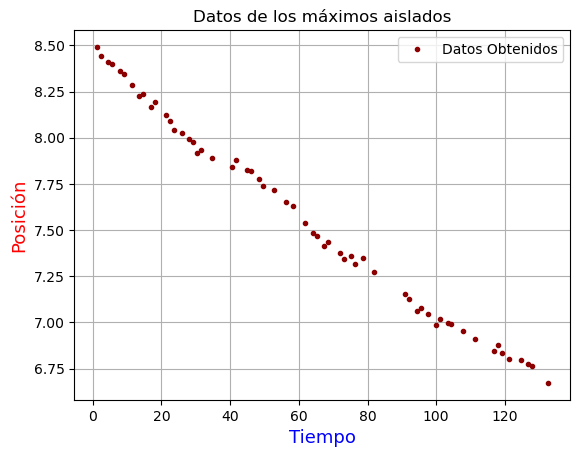

In [33]:
plt.plot(X_11,G_11,'.', color='darkred', label = 'Datos Obtenidos')
plt.xlabel('Tiempo',color='b',size=13)
plt.ylabel('Posición',color='r',size=13)
plt.title('Datos de los máximos aislados')
plt.legend()
plt.grid()

In [34]:
def calcular_coeficientes_exponenciales(x, y):
    y_log = np.log(y)
    
    A = np.vstack([np.ones_like(x), x]).T
    b = y_log
    
    
    coeficientes_log = np.linalg.lstsq(A, b, rcond=None)[0]
    
    
    log_a = coeficientes_log[0]
    b = coeficientes_log[1]
    
    
    a = np.exp(log_a)
    
    return a, b

def evaluar_exponencial(a, b, x):
    y = np.zeros_like(x)
    for i in range(len(y)):
        y[i] = a * np.exp(b * x[i])
    return y

a, b = calcular_coeficientes_exponenciales(X_11, G_11)
X_2 = np.linspace(0,np.max(X_11),10000)
display(X_2)
y_pred = evaluar_exponencial(a, b, X_2)

print(f"Coeficientes encontrados: a = {a}, b = {b}")
print(f"Valores predichos: {y_pred}")


array([0.00000000e+00, 1.32479915e-02, 2.64959829e-02, ...,
       1.32440171e+02, 1.32453419e+02, 1.32466667e+02])

Coeficientes encontrados: a = 8.441747365995692, b = -0.001802639296039039
Valores predichos: [8.44174737 8.44154577 8.44134417 ... 6.64887365 6.64871487 6.64855609]


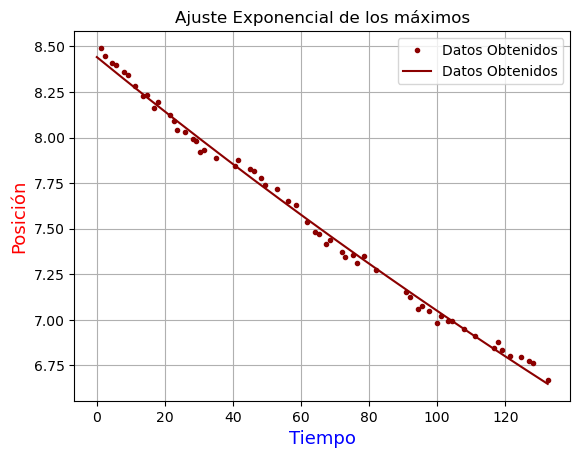

In [35]:
plt.plot(X_11,G_11,'.', color='darkred', label = 'Datos Obtenidos')
plt.plot(X_2,y_pred, color='darkred', label = 'Datos Obtenidos')
plt.xlabel('Tiempo',color='b',size=13)
plt.ylabel('Posición',color='r',size=13)
plt.title('Ajuste Exponencial de los máximos')
plt.legend()
plt.grid()

0.23657464409178522

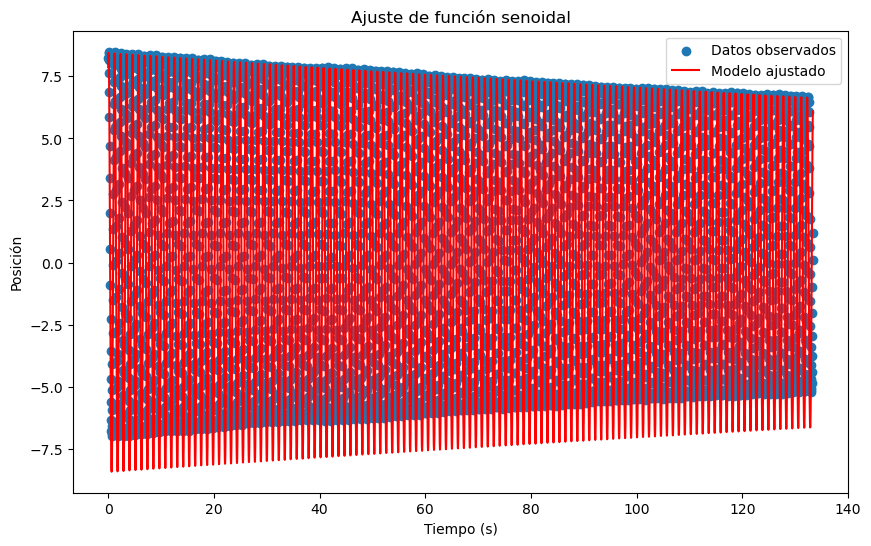

In [100]:
import numpy as np
from scipy.optimize import least_squares

def modelo_senoidal(params, t, y, w):

    a, fase = params
    return a * np.sin(w * t + fase) - y

def ajustar_senoidal(t, y, w):

    params_iniciales = [np.max(y), 0.0]
 
    resultado = least_squares(modelo_senoidal, params_iniciales, args=(t, y, w))
    
    
    a, fase = resultado.x
    return a, fase

def evaluar_senoidal(t, w, a, fase,a_1):
   
    return (a) * np.exp(a_1*t)*np.sin(w * t + fase)

w = 2 * np.pi / 1.13 
c, fase = ajustar_senoidal(Fps, A_1, w)
display(fase)
X_3 = np.linspace(0, np.max(Fps), 10000)

y_pred2 = evaluar_senoidal(X_3, w, a, 1.2,b)


plt.figure(figsize=(10, 6))
plt.scatter(Fps, A_1, label='Datos observados')
plt.plot(X_3, y_pred2, color='red', label='Modelo ajustado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición')
plt.title('Ajuste de función senoidal')
plt.legend()
plt.show()


In [105]:
X_0101 = np.zeros(150)
G_0101 = np.zeros(150)
az = 20
for i in range(len(X_0101)):
    X_0101[i] = Fps[az]
    G_0101[i] = A_1[az]
    az+=1
X_01010 = np.linspace(np.min(X_0101),np.max(X_0101),10000)
y_pred3 = evaluar_senoidal(X_01010, w, a,1.2,b)

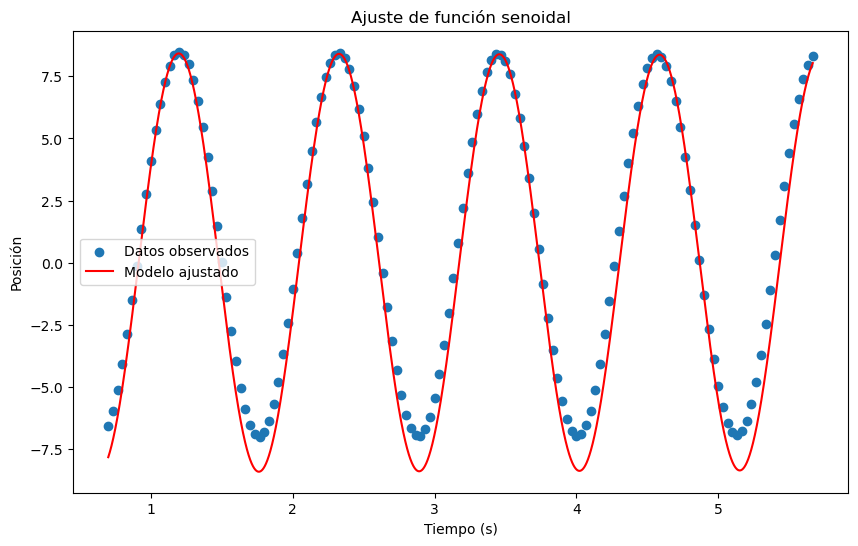

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(X_0101, G_0101, label='Datos observados')
plt.plot(X_01010, y_pred3, color='red', label='Modelo ajustado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición')
plt.title('Ajuste de función senoidal')
plt.legend()
plt.show()